<div style="text-align: center; margin: auto; background:#b4cc3d; padding:10px; color:white; font-family:Calibri ;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width:120px; padding-top: 20px;">
    <h1  style="font-size:2.8rem">Data Mining Project: ABCDEats Customer Data</h1>
    <p style='font-size:1.2rem;'>NOVA Information Management School </p>    
    <p style='font-size:1.2rem;'>Master in Data Science and Advanced Analytics</p>    
    <img src="https://cdni.iconscout.com/illustration/premium/thumb/food-delivery-service-by-scooter-illustration-download-in-svg-png-gif-file-formats--on-pack-e-commerce-shopping-illustrations-4403764.png" style="width:33rem;">
    <p style='font-size:1.3rem; padding:0; margin:0; font-weight:bold;'>Group 41 members:</p>
    <ul style='font-size:1.2rem; list-style-position: inside; padding-left:0; border:none;'>
        <li>Elcano Gaspar (20241021)</li>
        <li>Gasper Pereira (20230984)</li>
        <li>Pedro Costa (20222121)</li>
        <li>Rita Wang (20240551)</li>
    </ul> 
    <br>
    <p style='font-size:1.2rem; '>      Fall/Spring Semester 2024-2025</p>
</div>

<h1 style='margin-bottom: 3px' > Table of Contents </h1>

* [0. Imports and Dataset Loading](#imports)

* [1. Data Exploration](#dataexploration)
    * [1.1 Initial Analysis of the Dataset](#initial-analysis)
    * [1.2 Check for Missing Values](#missing-values)
    * [1.3 Duplicate Values](#duplicates)
    * [1.4 Data Types](#data-types)
    * [1.5 Variable Analysis](#variable-analysis)

* [2. Univariate Analysis](#univariate)
    * [2.1 Numerical Variables](#numerical)
    * [2.2 Categorical Variables](#categorical)

* [3. Data Preprocessing](#data-preprocessing)
    * [3.1 Feature Engineering](#feature-engineering)
        * [3.1.1 Numerical New Features](#numerical-new)
        * [3.1.2 Categorical New Features](#categorical-new)
    * [3.2 Imputation of Missing Values](#impute-missing)
    * [3.3 Outlier Removal](#outlier-removal)




<h1 id='imports'>0. Imports and Dataset Loading</h1>

In [80]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings

from itertools import combinations
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


from functions import * 


from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors



In [81]:
df = pd.read_csv("../Project data/DM2425_ABCDEats_DATASET.csv")

<h1 id='dataexploration'>1. Data Exploration</h1>

<h2 id='initial-analysis'>1.1 Initial analysis of the dataset</h2>

In [82]:
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<h2 id='missing-values'>1.2 Check for Missing Values</h2>


In [84]:
missing_data(df)

Missing Count  Missing %
HR_0                   1165       3.65
customer_age            727       2.28
first_order             106       0.33

Missing values in HR_0, customer_age and first_order. We'll look into taking care of these afterwards.\
`Low Missingness (<5%)`: HR_0, Customer_age and First_order (can be imputed without introducing bias)

<h2>1.3 Change index to customer_id</h2>

> Before setting customer_id to index, we should check for any duplicates first.

In [85]:
df[df.duplicated(keep=False)]

customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550          22.0            10             20   
25792  8aa9bbc147            8550          24.0             2              4   
25793  8aa9bbc147            8550          24.0             2              4   
27514  cf563a0a98            8550          27.0             2              2   
27515  cf563a0a98            8550          27.0             2              2   
27653  201a13a34d            8550          28.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28706  06018a56be            8550          27.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29922  fac7984c0d            8550          29.0             1              1   
29926  fac7984c0d            8550          29.0             1              1   
30402  b8e7a643a4            8550          18.0             2              4   
30416  b8e7a643a4            8550          18.0             2              4   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  ...  \
3355          1          2.0          89    FREEBIE           CARD  ...   
3379          1          2.0          89    FREEBIE           CARD  ...   
7867          3          7.0          85          -           CARD  ...   
7887          3          7.0          85          -           CARD  ...   
16227         3         23.0          66    FREEBIE           CARD  ...   
16230         3         23.0          66    FREEBIE           CARD  ...   
20855         0         35.0          35          -           CARD  ...   
20907         0         35.0          35          -           CARD  ...   
24328         1         47.0          52   DELIVERY           CARD  ...   
24329         1         47.0          52   DELIVERY           CARD  ...   
24822         9         48.0          88          -           CARD  ...   
24827         9         48.0          88          -           CARD  ...   
25792         2         53.0          59   DELIVERY           DIGI  ...   
25793         2         53.0          59   DELIVERY           DIGI  ...   
27514         0         61.0          62    FREEBIE           CASH  ...   
27515         0         61.0          62    FREEBIE           CASH  ...   
27653         1         62.0          62   DELIVERY           CARD  ...   
27739         1         62.0          62   DELIVERY           CARD  ...   
28706         0         67.0          89    FREEBIE           DIGI  ...   
28713         0         67.0          89    FREEBIE           DIGI  ...   
29922         0         75.0          75   DELIVERY           CARD  ...   
29926         0         75.0          75   DELIVERY           CARD  ...   
30402         0         78.0          78    FREEBIE           CASH  ...   
30416         0         78.0          78    F

> There are 13 duplicates, note that its curious how they all have the same customer_region 8550. Since we don't consider these to be actual cases, and simply input error, we'll delete the duplicates.

In [86]:
df_original = df.copy()
df = df.drop_duplicates()
df_original.shape[0] - df.shape[0] #Display number of duplicates dropped

13

> Now let's set customer_id as the index.

In [87]:
df.set_index("customer_id", inplace=True)

<h2 id='duplicates'>1.4 Duplicate Values</h2>

> After setting customer_id as index, we should check again for duplicate values.

In [88]:
df[df.duplicated(keep=False)] 

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
412c8c0b2d             2360          24.0             1              2   
4336560739             2360          24.0             1              2   
11a56d6fbf             4660          32.0             3              4   
dcc76a0a1b             4660          32.0             3              4   
839055942a             4660          25.0             4              5   
...                     ...           ...           ...            ...   
29d575f3cc             8670          31.0             1              2   
4ff02cb613             8670          30.0             1              1   
a6bdd77ae2             8670          30.0             1              1   
1f616608ed             2360          23.0             1              2   
6020a9ce3d             2360          23.0             1              2   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
412c8c0b2d          0          0.0          11   DELIVERY           DIGI   
4336560739          0          0.0          11   DELIVERY           DIGI   
11a56d6fbf          3          1.0          43          -           CARD   
dcc76a0a1b          3          1.0          43          -           CARD   
839055942a          5          3.0          69          -           CARD   
...               ...          ...         ...        ...            ...   
29d575f3cc          0         82.0          82          -           CARD   
4ff02cb613          0         83.0          83   DELIVERY           DIGI   
a6bdd77ae2          0         83.0          83   DELIVERY           DIGI   
1f616608ed          1         87.0          87   DELIVERY           CARD   
6020a9ce3d          1         87.0          87   DELIVERY           CARD   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
412c8c0b2d           0.00  ...      0      0      0      0      0      0   
4336560739           0.00  ...      0      0      0      0      0      0   
11a56d6fbf          10.15  ...      0      1      2      0      0      0   
dcc76a0a1b          10.15  ...      0      1      2      0      0      0   
839055942a          11.59  ...      0      1      1      2      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
29d575f3cc           0.00  ...      0      0      0      0      1      0   
4ff02cb613           0.00  ...      0      0      0      0      0      0   
a6bdd77ae2           0.00  ...      0      0      0      0      0      0   
1f616608ed           0.00  ...      0      0      0      1      0      0   
6020a9ce3d           0.00  ...      0      0      0      1      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
412c8c0b2d       1      0      0      0  
4336560739       1      0      0      0  
11a56d6fbf       0      0      0      0  
dcc76a0a1b       0      0      0      0  
839055942a       1      0      0      0  
...            ...    ...    ...    ...  
29d575f3cc       0      0      0      0  
4ff02cb613       0      0      0      0  
a6bdd77ae2       0      0      0      0  
1f616608ed       0      0      0      0  
6020a9ce3d       0      0      0      0  

[94 rows x 55 columns]

In [89]:
n_dups = len(df[df.duplicated(keep=False)]) / 2
n_dups # 47 
df_len_prev = df.shape[0]
df = df.drop_duplicates()
n_dups_droped = df_len_prev - df.shape[0]
n_dups_droped

47

<h2 id='data-types'>1.5 Data types</h2>

In [90]:
df.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

> <code>customer_age</code>,<code>HR_0</code> and <code>first_order</code> should be int, but are floats right now because of the missing values.

><code>customer_region</code> should be categorical, but we'll change this only after deciding how to group the 3 regions.

<h2 id='variable-analysis'>1.6 Numercal and Categorical Variables</h2>

Separating the variables in continuous and categorical to make the analysis of the variables easier.
| Numerical Variables | Categorical Variables |
| --- | --- |
| customer_age | customer_region |
| vendor_count |last_promo  |
| product_count | payment_method |
|is_chain| |
|first_order||
|last_order||
|CUI||
|HR_0 to HR_23||
|DOW_0 to DOW_6||

In [91]:
numerical = ['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
        'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

categorical = ['customer_region','last_promo','payment_method']

> Let's create variables saving all of the HR, DOW, and CUI together:

In [92]:
hr_cols = [col for col in df.columns if "HR" in col]
dow_cols = [col for col in df.columns if "DOW" in col]
CUI_cols = [col for col in df.columns if "CUI" in col]

<h2>1.7 Unique values</h2>

<h3>1.7.1 Values in Numerical</h3>

In [93]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

customer_age:[18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]
vendor_count:[ 2  1  3  4  5  7  6 11  9  8 12 14 20 13 10 16 24 18 17 15 25 30 19 21
 23 22 28 32 41 40 26  0 27 34 31 35 29]
product_count:[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]
is_chain:[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]
f

In [94]:
df[df['HR_0'].isna()]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
ae38da6386             8670          21.0             2              3   
a21a839c77             4140          19.0             1              4   
9237d23413             8670          22.0             3              4   
8c6ffd7357             4660          25.0             3              4   
67c6c9f9c4             4660          24.0             1              3   
...                     ...           ...           ...            ...   
37b72b449d             2360          23.0             1              4   
ac382ddfd1                -          28.0             1              2   
96f1fc25e3             8670          25.0             2              2   
d7c7face7e             2440          26.0             1              1   
6624e03cdd             8670          28.0             1              2   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
ae38da6386          1          0.0           7   DELIVERY           DIGI   
a21a839c77          4          0.0          21          -           CARD   
9237d23413          2          0.0          27          -           CARD   
8c6ffd7357          1          0.0          28          -           CARD   
67c6c9f9c4          0          0.0          36    FREEBIE           DIGI   
...               ...          ...         ...        ...            ...   
37b72b449d          0         85.0          85   DELIVERY           DIGI   
ac382ddfd1          2         87.0          89   DELIVERY           CARD   
96f1fc25e3          1         88.0          88   DELIVERY           CASH   
d7c7face7e          1         90.0          90   DELIVERY           CASH   
6624e03cdd          0          NaN           0   DELIVERY           CARD   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
ae38da6386           0.00  ...      0      0      0      0      0      0   
a21a839c77           0.00  ...      0      0      0      0      0      1   
9237d23413           5.77  ...      0      0      0      0      0      0   
8c6ffd7357          27.54  ...      0      1      0      0      0      0   
67c6c9f9c4           0.00  ...      1      0      0      0      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
37b72b449d           0.00  ...      0      0      0      0      0      0   
ac382ddfd1           0.00  ...      0      0      0      0      0      0   
96f1fc25e3           0.00  ...      0      0      0      0      0      0   
d7c7face7e           2.61  ...      0      0      0      0      0      0   
6624e03cdd          23.83  ...      0      0      0      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
ae38da6386       0      0      0      0  
a21a839c77       0      0      1      0  
9237d23413       0      0      0      0  
8c6ffd7357       0      0      0      0  
67c6c9f9c4       0      1      0      0  
...            ...    ...    ...    ...  
37b72b449d       0      0      0      0  
ac382ddfd1       0      0      0      1  
96f1fc25e3       0      0      0      0  
d7c7face7e       0      0      0      0  
6624e03cdd       0      0      0      0  

[1164 rows x 55 columns]

> <code>HR_0</code> only has values 0 and NaN, and the other hours don't have missing values. Since these variables count for the number of orders at that hour, and DOW counts for the number of order made in each day of the week, it is safe to assume that the sum of these 2 groups of variables will give us the total number of orders that were made. Since DOW has no missing values, we can obtain the number of total order. 1164 cases where the <code>HR_0</code> is NaN.

<h3>1.7.2 Values in Categorical</h3>

In [95]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

customer_region:['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo:['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method:['DIGI' 'CASH' 'CARD']


> There are 442 rows where the customer region is '-'. We will convert these to NaN now, and then impute it later.

In [96]:
(df['customer_region']=='-').sum()

442

In [97]:
df['customer_region'] = df['customer_region'].replace('-', np.nan)

In [98]:
missing_data(df)

Missing Count  Missing %
HR_0                      1164       3.66
customer_age               727       2.28
customer_region            442       1.39
first_order                106       0.33

> 16748 of the values in last_promo are '-', we will consider this to be the cases where the customers didn't use a promo code. We will convert it to 'NO PROMO' for easier interpretation.

In [99]:
(df['last_promo']=='-').sum()

16722

In [100]:
# Replace the value '-' in 'last_promo' with 'no promo'
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

print(df['last_promo'].value_counts()) 

last_promo
NO PROMO    16722
DELIVERY     6271
DISCOUNT     4491
FREEBIE      4344
Name: count, dtype: int64


<h2>1.8 Inconherences</h2>

> <code>is_chain</code>'s description says that it indicates whether the customer's order was from a chain restaurant. We will consider the numbers as being the number of times that a customer has ordered from a chain restaurant.


> Let's check for rows where CUI or DOW is zero, and drop those.

In [101]:
filtered_df = df[((df[CUI_cols] == 0).all(axis=1) | (df[dow_cols] == 0).all(axis=1))]

filtered_df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3   NO PROMO           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86   NO PROMO           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89   NO PROMO           CASH   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
4903041977            0.0  ...      0      0      0      0      0      0   
c94b288475            0.0  ...      0      0      0      0      0      0   
f687717dc1            0.0  ...      0      0      0      0      0      0   
c6cf0b76fb            0.0  ...      0      0      0      0      0      0   
1b7c34738e            0.0  ...      0      0      0      0      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
177ede2420            0.0  ...      0      0      0      0      0      0   
0039059c9c            0.0  ...      0      0      0      0      0      0   
0e60632fe2            0.0  ...      0      0      0      0      0      0   
28ed1f1e3f            0.0  ...      0      0      0      0      0      0   
4c06e104de            0.0  ...      0      0      0      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
4903041977       0      0      0      0  
c94b288475       0      0      0      0  
f687717dc1       0      0      0      0  
c6cf0b76fb       0      0      0      0  
1b7c34738e       0      0      0      0  
...            ...    ...    ...    ...  
177ede2420       0      0      0      0  
0039059c9c       0      0      0      0  
0e60632fe2       0      0      0      0  
28ed1f1e3f       0      0      0      0  
4c06e104de       0      0      0      0  

[138 rows x 55 columns]

> We should drop these rows

In [102]:
before = df.shape[0]

In [103]:
# Drop rows where 'is_chain' != 0 and all values in 'CUI_cols' and 'dow_cols' are 0
df = df[~((df[CUI_cols] == 0).all(axis=1) & (df[dow_cols] == 0).all(axis=1))]

df
after=df.shape[0]

In [104]:
before-after

138

> Product count: is zero, but there were purchases made. As there are values in DOW columns, and it's 1.

In [105]:
df[df["product_count"] == 0].shape # 18 cases

(18, 55)

In [106]:
df[df["product_count"] == 0].head(5)

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
aed85972bb             4660          27.0             1              0   
b2ebe2e6e0             4660          43.0             1              0   
6f723d9894             4660          36.0             1              0   
9d74f2ac81             4660          27.0             1              0   
27b7eed8fa             4660          35.0             1              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
aed85972bb          0          6.0           6   DISCOUNT           CARD   
b2ebe2e6e0          0          6.0           6   NO PROMO           CARD   
6f723d9894          0         13.0          13   DELIVERY           CASH   
9d74f2ac81          0         19.0          19   DELIVERY           CARD   
27b7eed8fa          0         20.0          20   DISCOUNT           DIGI   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
aed85972bb            0.0  ...      0      0      0      0      1      0   
b2ebe2e6e0            0.0  ...      1      0      0      0      0      0   
6f723d9894            0.0  ...      1      0      0      0      0      0   
9d74f2ac81            0.0  ...      0      0      0      1      0      0   
27b7eed8fa            0.0  ...      0      1      0      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
aed85972bb       0      0      0      0  
b2ebe2e6e0       0      0      0      0  
6f723d9894       0      0      0      0  
9d74f2ac81       0      0      0      0  
27b7eed8fa       0      0      0      0  

[5 rows x 55 columns]

In [107]:
df["product_count"] = np.where((df["product_count"] == 0) & (df[dow_cols].sum(axis=1) > 0), 1, df["product_count"])

df[df["product_count"] == 0].shape # 0 cases

(0, 55)

<h1 id='univariate'>2. Univariate analysis</h1>

<h2 id='numerical'>2.1 Numerical variables</h2>

In [108]:
df.describe().T

count       mean        std   min   25%   50%  \
customer_age              30963.0  27.510351   7.165122  15.0  23.0  26.0   
vendor_count              31690.0   3.116157   2.770552   1.0   1.0   2.0   
product_count             31690.0   5.693500   6.962131   1.0   2.0   3.0   
is_chain                  31690.0   2.829378   3.983606   0.0   1.0   2.0   
first_order               31584.0  28.391559  24.069555   0.0   7.0  22.0   
last_order                31690.0  63.749511  23.185617   0.0  49.0  70.0   
CUI_American              31690.0   4.899962  11.673741   0.0   0.0   0.0   
CUI_Asian                 31690.0  10.002830  23.613427   0.0   0.0   0.0   
CUI_Beverages             31690.0   2.306775   8.487756   0.0   0.0   0.0   
CUI_Cafe                  31690.0   0.805655   6.446599   0.0   0.0   0.0   
CUI_Chicken Dishes        31690.0   0.772339   3.667615   0.0   0.0   0.0   
CUI_Chinese               31690.0   1.438139   8.213456   0.0   0.0   0.0   
CUI_Desserts              31690.0   0.887919   5.268367   0.0   0.0   0.0   
CUI_Healthy               31690.0   0.956076   5.848291   0.0   0.0   0.0   
CUI_Indian                31690.0   1.637341   7.458630   0.0   0.0   0.0   
CUI_Italian               31690.0   3.248809  11.276295   0.0   0.0   0.0   
CUI_Japanese              31690.0   3.006091  10.202977   0.0   0.0   0.0   
CUI_Noodle Dishes         31690.0   0.715805   4.550011   0.0   0.0   0.0   
CUI_OTHER                 31690.0   3.015915   9.794972   0.0   0.0   0.0   
CUI_Street Food / Snacks  31690.0   3.923972  15.554078   0.0   0.0   0.0   
CUI_Thai                  31690.0   0.845420   4.444620   0.0   0.0   0.0   
DOW_0                     31690.0   0.558315   1.014999   0.0   0.0   0.0   
DOW_1                     31690.0   0.570243   1.045980   0.0   0.0   0.0   
DOW_2                     31690.0   0.593373   1.047218   0.0   0.0   0.0   
DOW_3                     31690.0   0.621994   1.071476   0.0   0.0   0.0   
DOW_4                     31690.0   0.680909   1.089676   0.0   0.0   0.0   
DOW_5                     31690.0   0.655790   1.071277   0.0   0.0   0.0   
DOW_6                     31690.0   0.707321   1.169128   0.0   0.0   0.0   
HR_0                      30526.0   0.000000   0.000000   0.0   0.0   0.0   
HR_1                      31690.0   0.053960   0.317066   0.0   0.0   0.0   
HR_2                      31690.0   0.063459   0.352403   0.0   0.0   0.0   
HR_3                      31690.0   0.118902   0.498221   0.0   0.0   0.0   
HR_4                      31690.0   0.102051   0.438310   0.0   0.0   0.0   
HR_5                      31690.0   0.082203   0.359384   0.0   0.0   0.0   
HR_6                      31690.0   0.070022   0.330224   0.0   0.0   0.0   
HR_7                      31690.0   0.077091   0.378368   0.0   0.0   0.0   
HR_8                      31690.0   0.132502   0.637302   0.0   0.0   0.0   
HR_9                      31690.0   0.235279   0.726896   0.0   0.0   0.0   
HR_10                     31690.0   0.331051   0.892604   0.0   0.0   0.0   
HR_11                     31690.0   0.379962   0.961827   0.0   0.0   0.0   
HR_12                     31690.0   0.315620   0.844410   0.0   0.0   0.0   
HR_13                     31690.0   0.237362   0.638340   0.0   0.0   0.0   
HR_14                     31690.0   0.216346   0.599387   0.0   0.0   0.0   
HR_15                     31690.0   0.278163   0.739746   0.0   0.0   0.0   
HR_16                     31690.0   0.357873   0.875766   0.0   0.0   0.0   
HR_17                     31690.0   0.392805   0.945956   0.0   0.0   0.0   
HR_18                     31690.0   0.338593   0.896114   0.0   0.0   0.0   
HR_19                     31690.0   0.246923   0.797429   0.0   0.0   0.0   
HR_20                     31690.0   0.143421   0.588077   0.0   0.0   0.0   
HR_21                     31690.0   0.071537   0.349500   0.0   0.0   0.0   
HR_22                     31690.0   0.048438   0.298663   0.0   0.0   0.0   
HR_23                   

In [109]:
numericals = [col for col in df.columns if df[col].dtype != object and df[col].dtype != bool]
subset = [x for x in numericals if x not in hr_cols and x not in CUI_cols and x not in dow_cols]


c:\Users\emano\Documents\NOVA\Data Mining\Projeto-Data-Mining\Part 2\functions.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


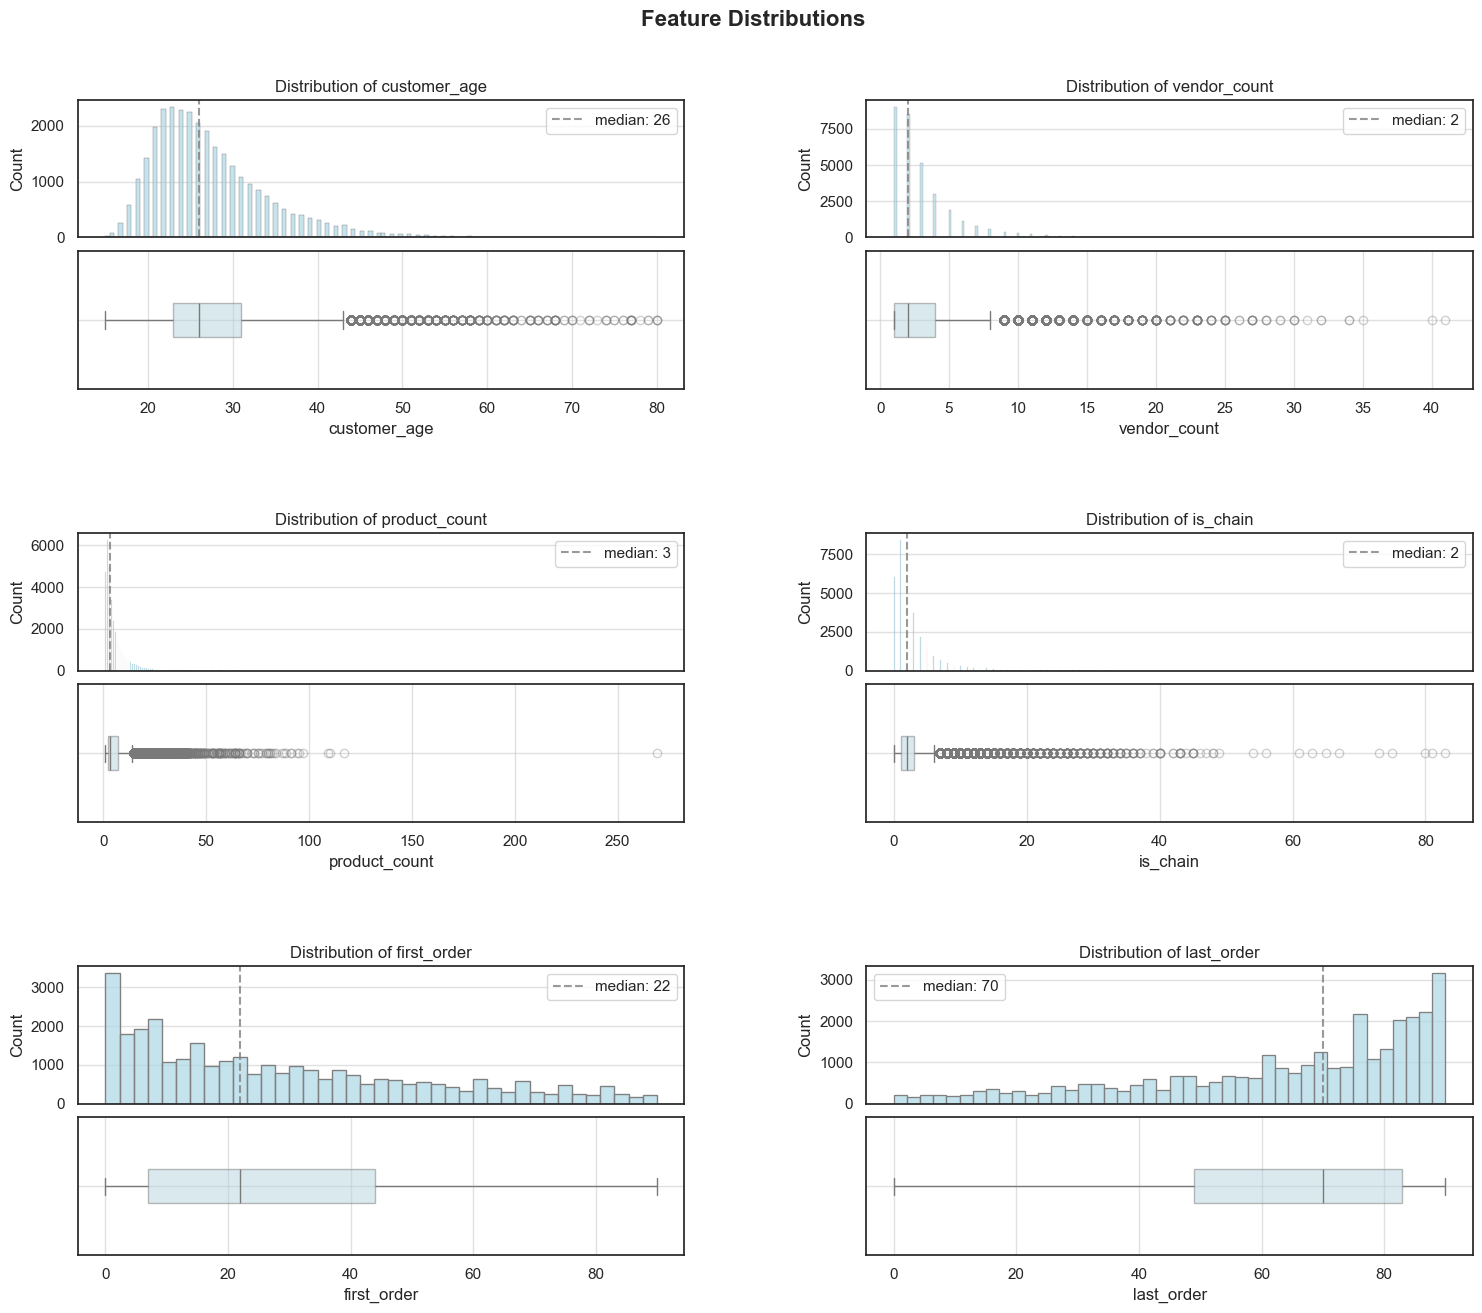

In [110]:
plot_distribution_grid(df,subset)

c:\Users\emano\Documents\NOVA\Data Mining\Projeto-Data-Mining\Part 2\functions.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


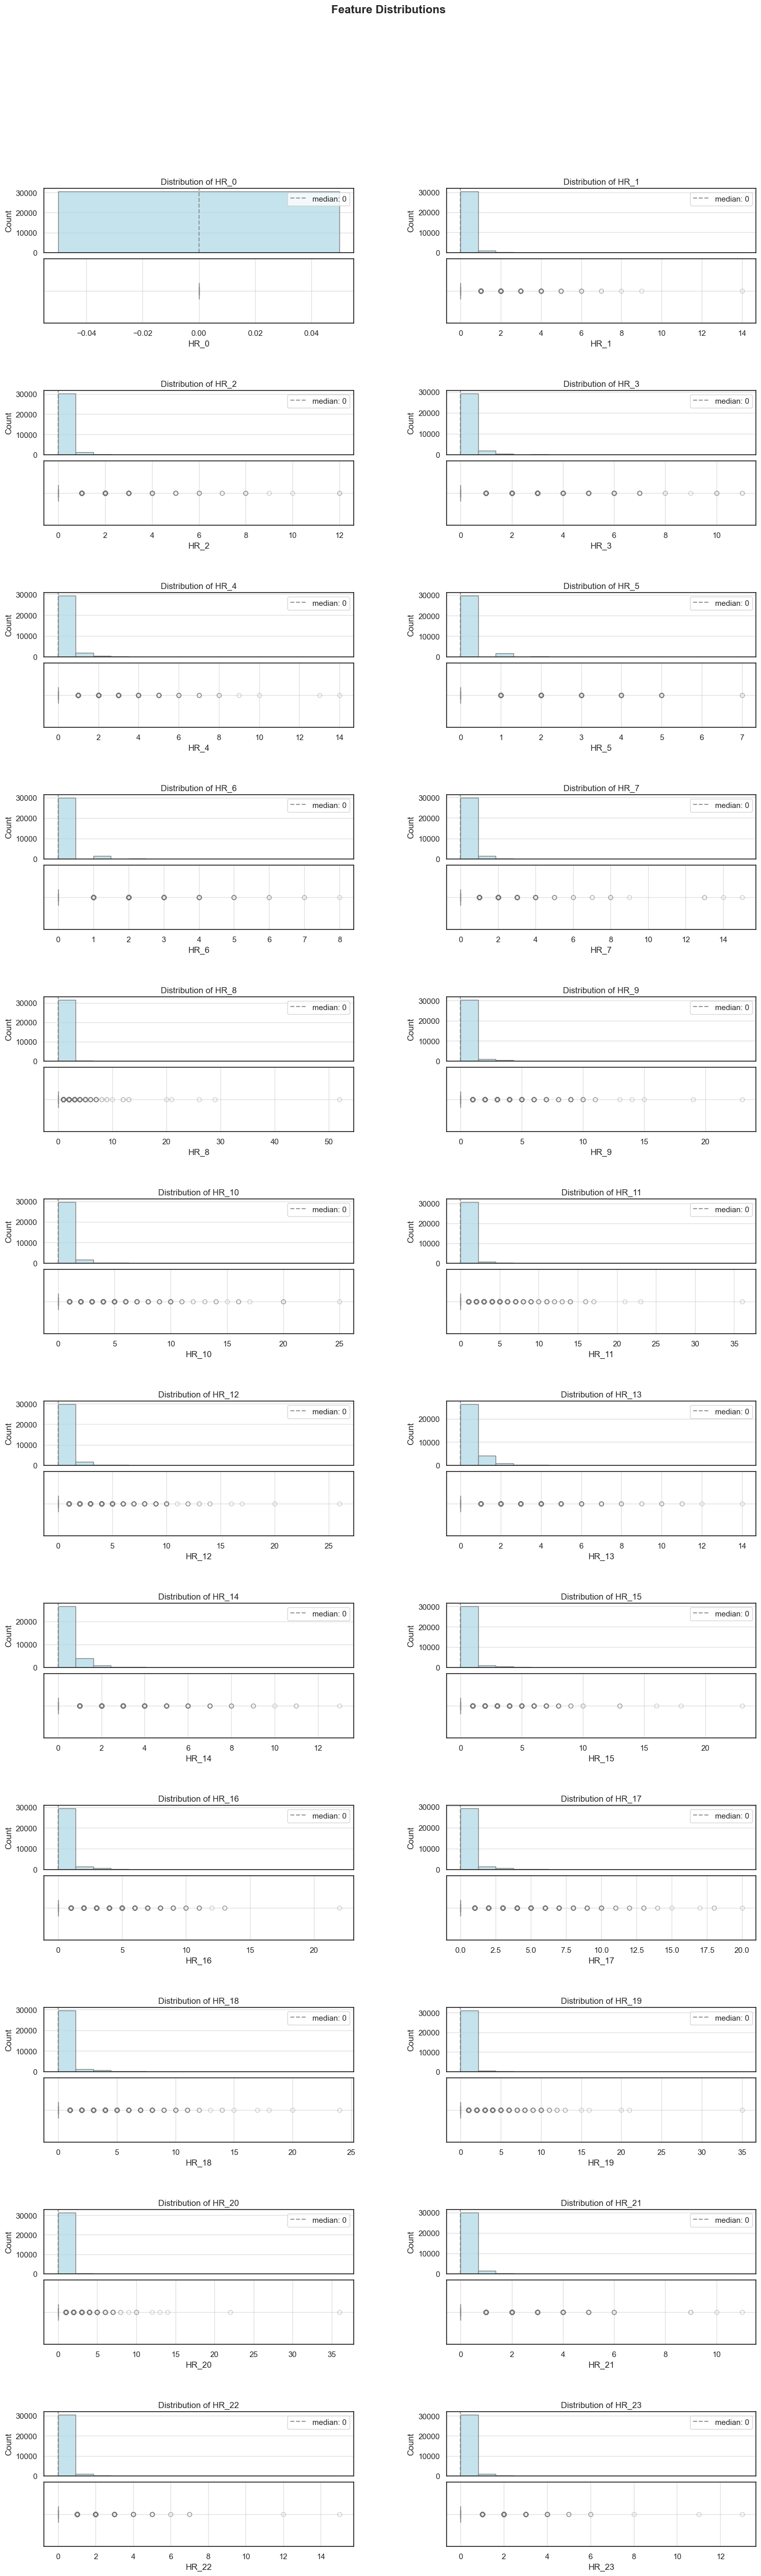

In [111]:
plot_distribution_grid(df,hr_cols)

c:\Users\emano\Documents\NOVA\Data Mining\Projeto-Data-Mining\Part 2\functions.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


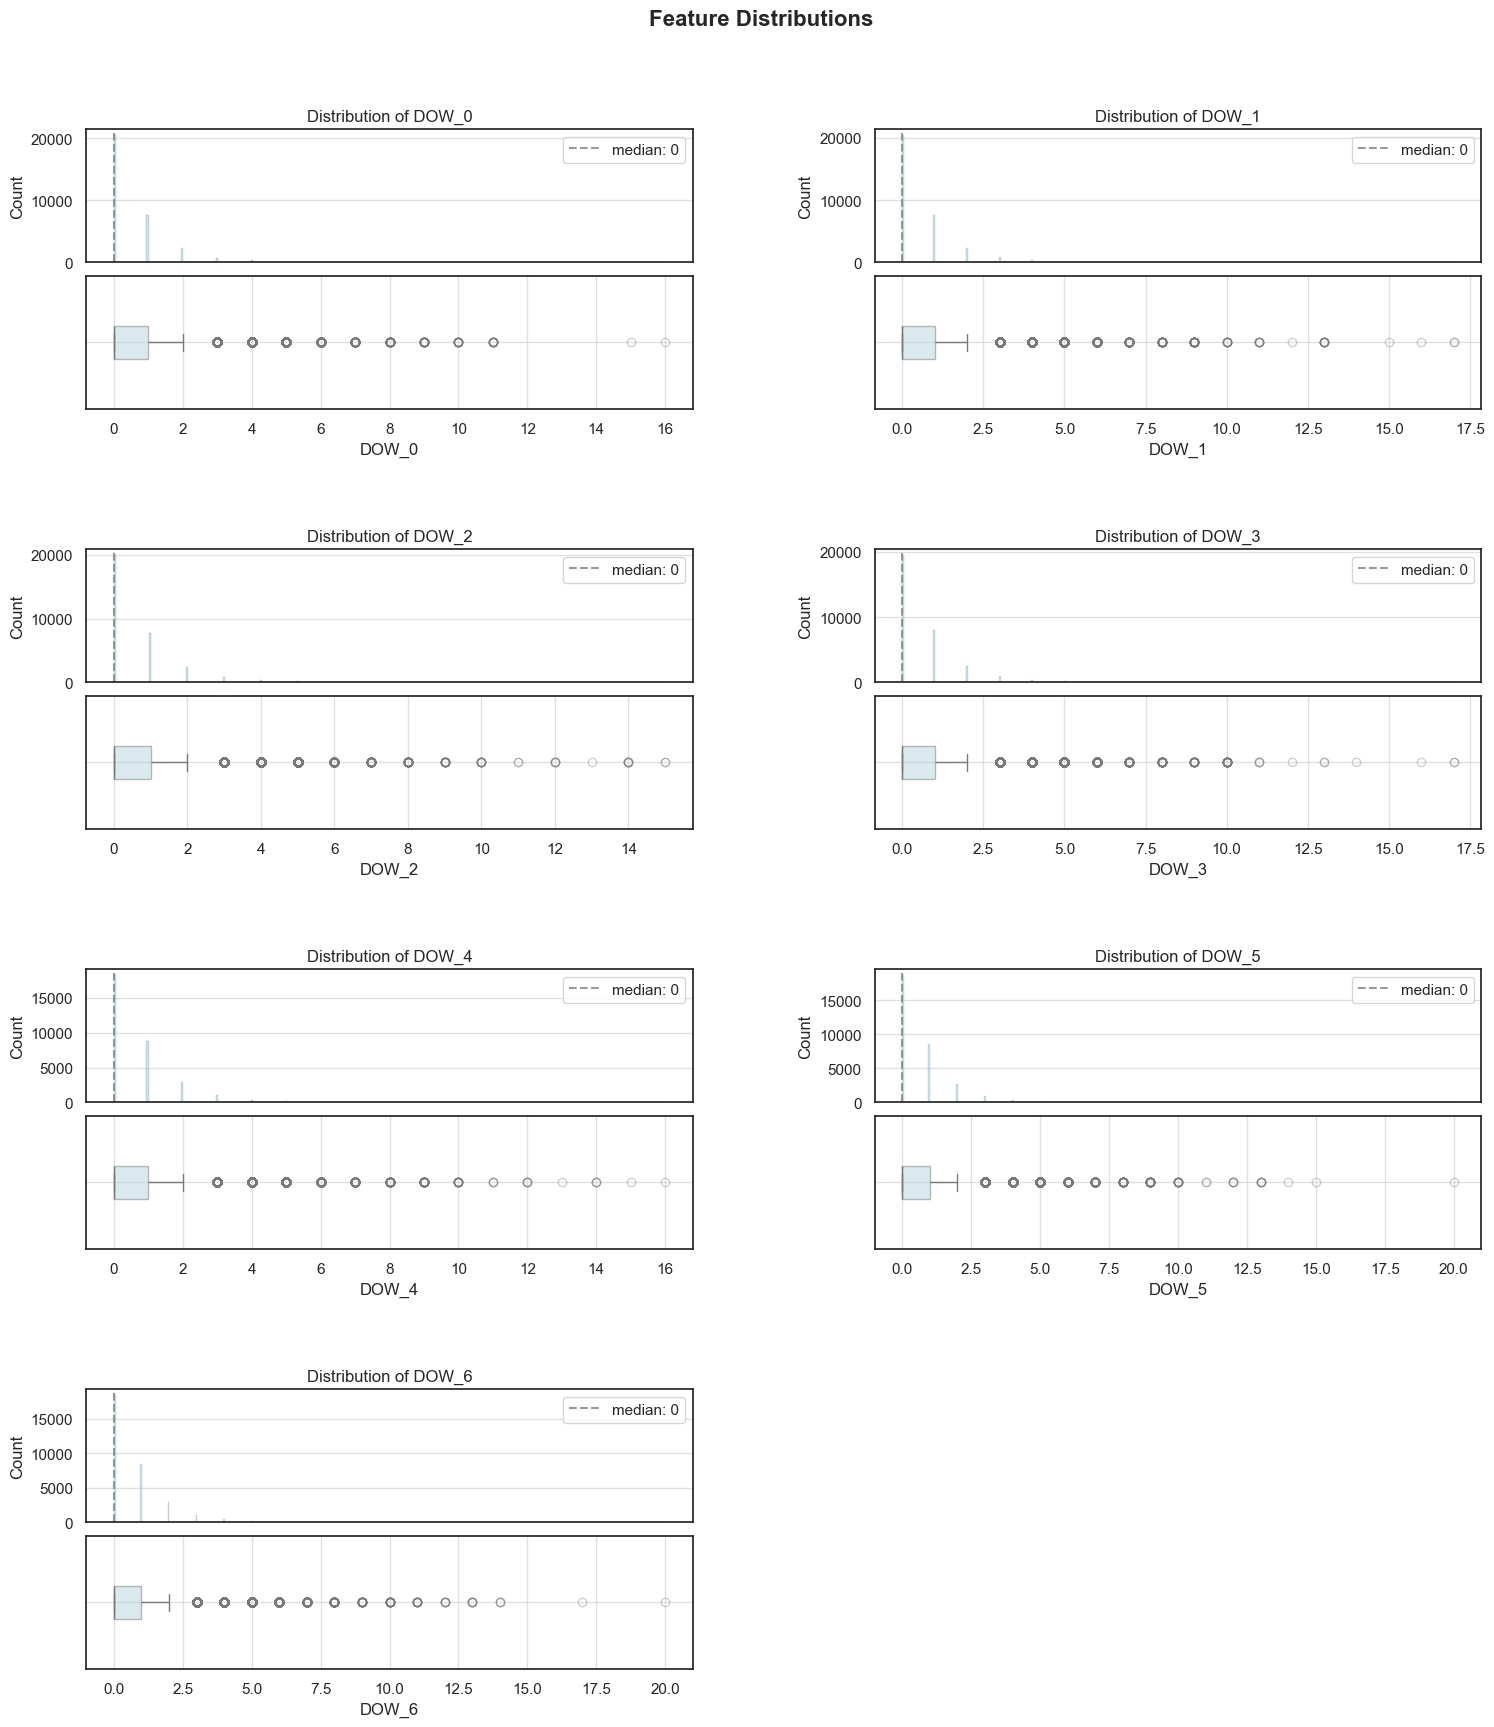

In [112]:
plot_distribution_grid(df,dow_cols)

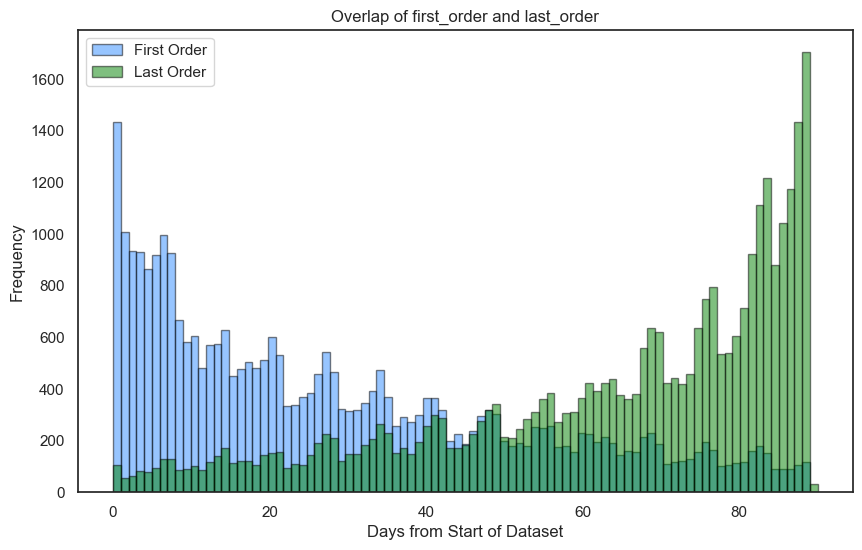

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(df.first_order, bins=91, alpha=0.5, label='First Order', color='#308dff', edgecolor='black')
plt.hist(df.last_order, bins=91, alpha=0.5, label='Last Order', color='green', edgecolor='black')
plt.xlabel('Days from Start of Dataset')
plt.ylabel('Frequency')
plt.title('Overlap of first_order and last_order')
plt.legend()
plt.show()

<Axes: >

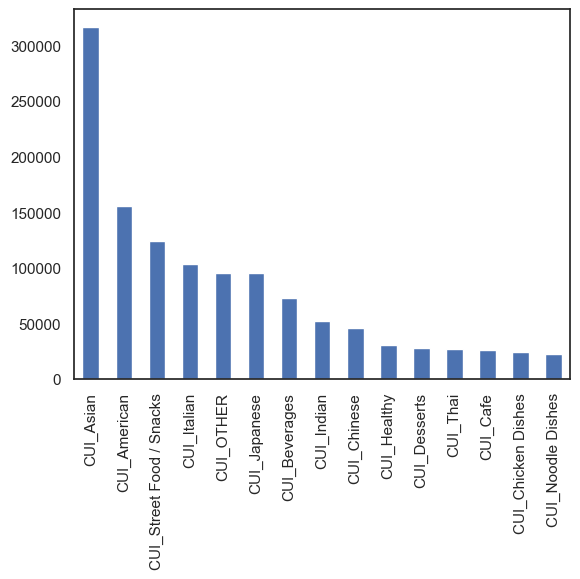

In [114]:
totals = {}
df[CUI_cols].describe().T
for col in CUI_cols:
    totals[col] = df[col].sum()
totals = pd.Series(totals)
totals.sort_values(ascending=False).plot(kind="bar")

In [115]:
cui_totals = df[CUI_cols].sum().sort_values(ascending=False)
cui_percentages = (cui_totals / cui_totals.sum()) * 100
cui_percentages

CUI_Asian                   26.006337
CUI_American                12.739401
CUI_Street Food / Snacks    10.201927
CUI_Italian                  8.446572
CUI_OTHER                    7.841072
CUI_Japanese                 7.815529
CUI_Beverages                5.997380
CUI_Indian                   4.256921
CUI_Chinese                  3.739016
CUI_Healthy                  2.485700
CUI_Desserts                 2.308499
CUI_Thai                     2.198005
CUI_Cafe                     2.094620
CUI_Chicken Dishes           2.008002
CUI_Noodle Dishes            1.861019
dtype: float64

In [116]:
#Calculate the percentage of zeros per cuisine
for col in CUI_cols:
    zero_orders = (df[col] == 0).mean() * 100
    print(f"% of customers who never ordered {col}: {zero_orders:.2f}%")

% of customers who never ordered CUI_American: 66.00%
% of customers who never ordered CUI_Asian: 62.53%
% of customers who never ordered CUI_Beverages: 82.89%
% of customers who never ordered CUI_Cafe: 95.70%
% of customers who never ordered CUI_Chicken Dishes: 89.76%
% of customers who never ordered CUI_Chinese: 88.90%
% of customers who never ordered CUI_Desserts: 93.65%
% of customers who never ordered CUI_Healthy: 93.16%
% of customers who never ordered CUI_Indian: 89.14%
% of customers who never ordered CUI_Italian: 79.68%
% of customers who never ordered CUI_Japanese: 80.16%
% of customers who never ordered CUI_Noodle Dishes: 92.98%
% of customers who never ordered CUI_OTHER: 77.81%
% of customers who never ordered CUI_Street Food / Snacks: 86.62%
% of customers who never ordered CUI_Thai: 92.51%


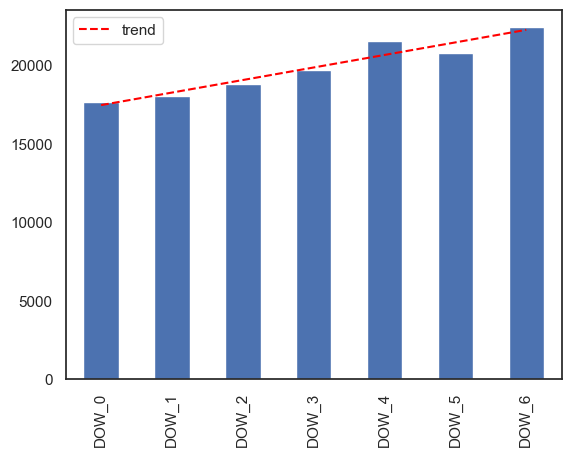

In [117]:
dof = {}
for col in dow_cols:
    dof[col] = df[col].sum()
dof = pd.Series(dof)
x = np.arange(len(dof))
y = dof.values
m, b = np.polyfit(x, y, 1) # linear regression; m = slope; b = intercept
dof.plot(kind="bar")
plt.plot(x, m*x + b, color="red", linestyle="--", label="trend")
plt.legend()

<Axes: >

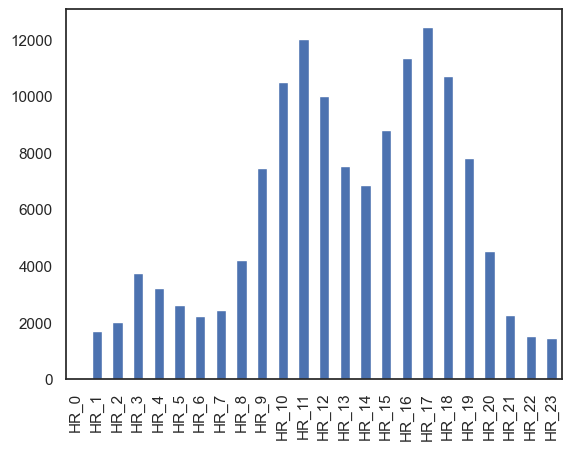

In [118]:
hours = {}
hr_cols = [col for col in df.columns if "HR" in col]
df[hr_cols].describe().T
for col in hr_cols:
    hours[col] = df[col].sum()
hours = pd.Series(hours)
hours.plot(kind="bar")

<h2 id='categorical'>2.2 Categorical variables</h2>

In [119]:
df.describe(include="object").T

count unique       top   freq
customer_region  31248      8      8670   9610
last_promo       31690      4  NO PROMO  16671
payment_method   31690      3      CARD  20065

In [120]:
cat_cols = [col for col in df.columns if df[col].dtype == object or df[col].dtype == bool]

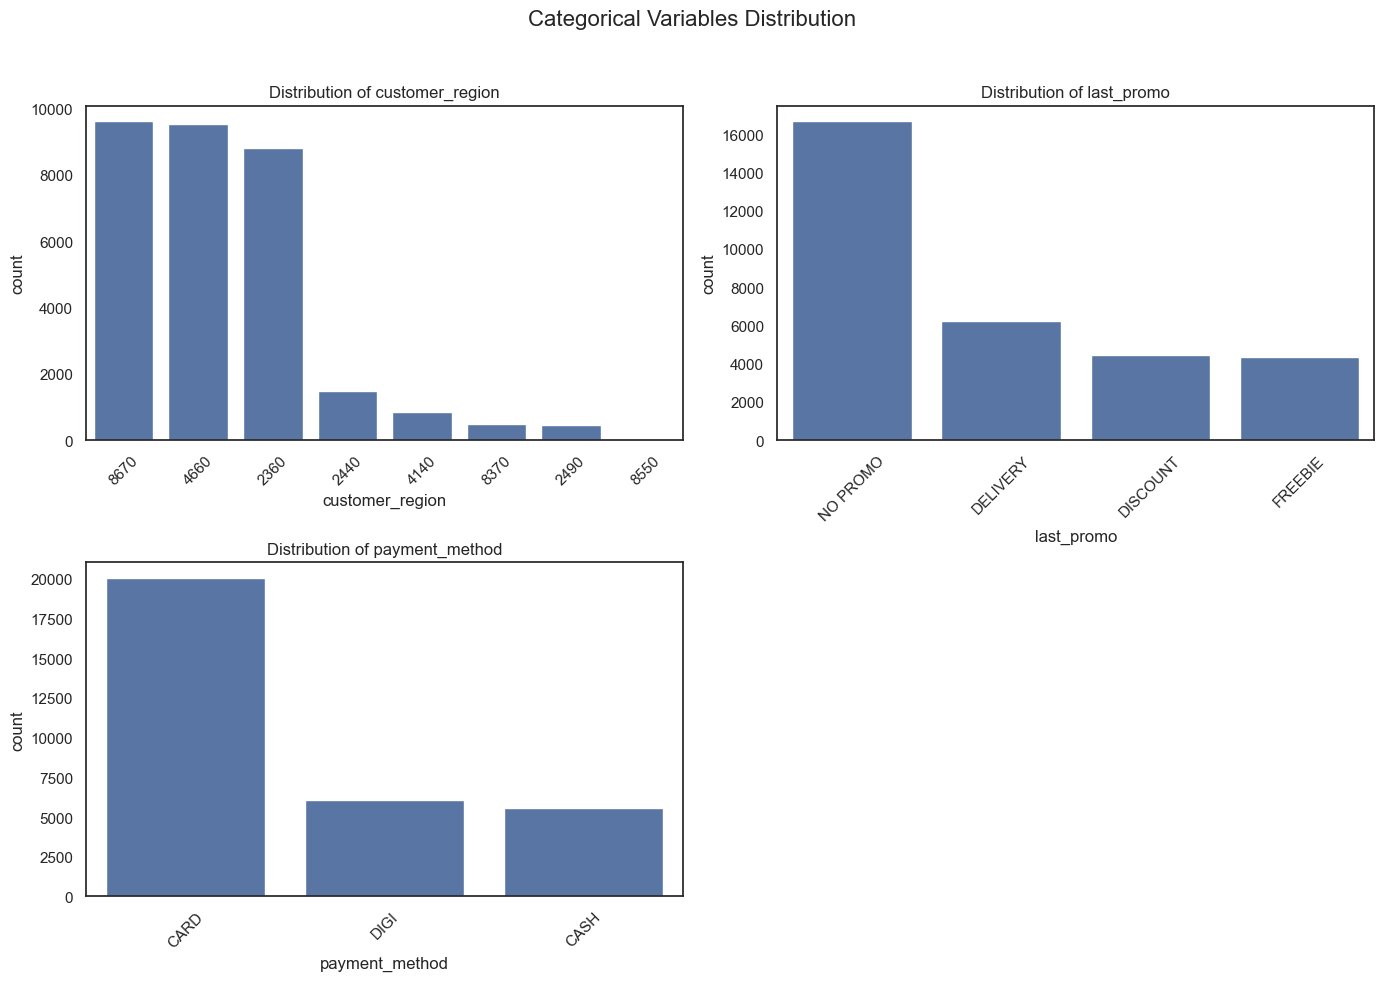

In [121]:
plot_categorical_distributions(df,cat_cols)

In [122]:
#Percentage for payment method
df['payment_method'].value_counts(normalize=True) * 100

payment_method
CARD    63.316504
DIGI    19.097507
CASH    17.585989
Name: proportion, dtype: float64

In [123]:
#Calculate the number and percentages of customer region
region_counts = df['customer_region'].value_counts()

region_percentages = df['customer_region'].value_counts(normalize=True) * 100

region_summary = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages
})
region_summary['Percentage'] = region_summary['Percentage'].round(2)
region_summary

Count  Percentage
customer_region                   
8670              9610       30.75
4660              9533       30.51
2360              8815       28.21
2440              1482        4.74
4140               856        2.74
8370               495        1.58
2490               444        1.42
8550                13        0.04

<h1 id='data-preprocessing'>3. Data preprocessing</h1>

<h2>3.1 Missing Values</h2>

In [124]:
missing_data(df)

Missing Count  Missing %
HR_0                      1164       3.67
customer_age               727       2.29
customer_region            442       1.39
first_order                106       0.33

<h3>3.1.1 First Order</h3>

> Impute using total_orders taht is calculated by addig up the dow columns.

In [125]:
df["first_order"] = np.where(df.first_order.isna(), df.last_order, df.first_order)

df.first_order.isna().sum()


0

<h3>3.1.2 HR_0</h3>

> Imputed by calculating the difference between total_hours and total_days

In [126]:
# Creathe column total_hours and total_days
df["total_hours"] = df[hr_cols].apply(lambda x: x.sum(), axis=1)
df["total_days"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)

In [127]:
# Use the created columns to impute HR_0
df["HR_0"] = np.where(df.HR_0.isna(), df.total_days - df.total_hours, df.HR_0)

# Drop the created columns
df.drop(columns=["total_hours", "total_days"], inplace=True)

# Check if there are still missing values
df.HR_0.isna().sum()

0

<h3>3.1.3 Customer Age and Region</h3>

> Let's impute customer age and region with KNN imputer. 

> Note that it is necessart to label encode costumer_region and then after imputing map it back.

In [128]:
df_to_impute = df.copy()

In [129]:
# Encode customer_region using LabelEncoder
label_encoder = LabelEncoder()
df_to_impute.loc[df_to_impute["customer_region"].notna(), "customer_region"] = label_encoder.fit_transform(
    df_to_impute.loc[df_to_impute["customer_region"].notna(), "customer_region"]
)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [130]:
# Select numerical columns, including customer_age and customer_region
num_cols = [col for col in df_to_impute.columns if df_to_impute[col].dtype != object and df_to_impute[col].dtype != bool]
num_cols.append("customer_region")


In [131]:
index_age = df_to_impute[df_to_impute["customer_age"].isna()].index

In [132]:
# Scale numerical columns
scaler = StandardScaler()
df_to_impute[num_cols] = scaler.fit_transform(df_to_impute[num_cols])

In [133]:
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_to_impute[num_cols] = imputer.fit_transform(df_to_impute[num_cols])

In [134]:
# Reverse scaling for interpretability
df_to_impute[num_cols] = scaler.inverse_transform(df_to_impute[num_cols])

In [135]:
# Round and decode customer_region back to its original labels
df_to_impute["customer_region"] = df_to_impute["customer_region"].round().astype(int)
label_map_invert = {value: key for key, value in label_mapping.items()}
df_to_impute["customer_region"] = df_to_impute["customer_region"].replace(label_map_invert)

# Round customer_age to nearest integer if needed
df_to_impute["customer_age"] = df_to_impute["customer_age"].round().astype(int)

In [136]:
df['customer_age']=df_to_impute['customer_age']
df['customer_region']=df_to_impute['customer_region']

In [137]:
print("As we can see, we no longer have missing values:")
missing_data(df)

As we can see, we no longer have missing values:


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

In [138]:
for cui in CUI_cols:
    df[cui] = np.abs(df[cui])

In [139]:
df[df['first_order']>df['last_order']]

Empty DataFrame
Columns: [customer_region, customer_age, vendor_count, product_count, is_chain, first_order, last_order, last_promo, payment_method, CUI_American, CUI_Asian, CUI_Beverages, CUI_Cafe, CUI_Chicken Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle Dishes, CUI_OTHER, CUI_Street Food / Snacks, CUI_Thai, DOW_0, DOW_1, DOW_2, DOW_3, DOW_4, DOW_5, DOW_6, HR_0, HR_1, HR_2, HR_3, HR_4, HR_5, HR_6, HR_7, HR_8, HR_9, HR_10, HR_11, HR_12, HR_13, HR_14, HR_15, HR_16, HR_17, HR_18, HR_19, HR_20, HR_21, HR_22, HR_23]
Index: []

[0 rows x 55 columns]

<h2> 3.2 Data types</h2>

In [140]:
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

> Where is float should be int, except for CUI because that's a monetary unit.

In [141]:
to_int = ['vendor_count','product_count','is_chain','first_order','last_order'] + hr_cols + dow_cols
df[to_int] = df[to_int].astype(int)
df.dtypes

customer_region              object
customer_age                  int32
vendor_count                  int32
product_count                 int32
is_chain                      int32
first_order                   int32
last_order                    int32
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int32
DOW_1                         int32
DOW_2                         int32
DOW_3                       

<h2 id='feature-engineering'>3.4 Feature engineering</h2>

<h3 id='numerical-new'> 3.4.1 Numerical new features</h3>

> 1. <code>total_orders</code>: The sum of the DOW columns gives us the total number of orders made by that customer. 
> 
> 2. <code>percentage_chain</code>: From the total orders made by the customer, what percentage is from a chain restaurant.
>
> 3. <code>customer_lifetime</code>: The number of days between the last order and first order (not sure to keep this one, since the customer_lifetime doesn't indicate much about the customer since they could have signed up later on).
>
> 4. <code>order_freq</code>: Average number of orders per week made by a customer over their customer lifetime. (Not sure if it makes sense since some customers could have lifetime less than a week).
>
>5. <code>avg_time_between_orders</code>: Avergae time (in days) between each order for a customer based on their lifetime and the total number of orders they've placed.
>
>6. <code>total_spent_log</code>: log transformed total spent
>
>7. <code>avg_order_value</code>: Average value of each order for a customer, based on their total spending and the total number of orders they placed.
>
> 8. <code>products_per_vendor</code>: Average of products purchased per vendor
>
> 9. 

In [142]:
df['recency']=90-df['last_order']

In [143]:
df['recency'].describe()

count    31690.000000
mean        26.250489
std         23.185617
min          0.000000
25%          7.000000
50%         20.000000
75%         41.000000
max         90.000000
Name: recency, dtype: float64

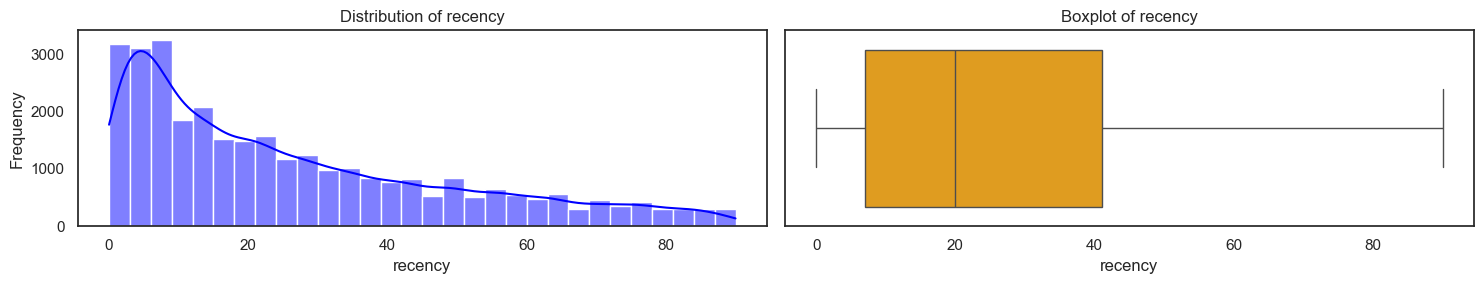

In [144]:
plot_distribution_and_boxplot(df,['recency'])

In [145]:
df["total_orders"] = df[dow_cols].apply(lambda x: x.sum(), axis=1)
df["percentage_chain"] =  df.is_chain / df.total_orders * 100
df["customer_lifetime"] = df.last_order - df.first_order
df["weekly_order_frequency"] = (np.where(df.customer_lifetime== 0,  df.total_orders / (1/ 7), df.total_orders / (df.customer_lifetime / 7))).round()
df["avg_time_between_orders"] = (df.customer_lifetime / df.total_orders).round()
df["total_spent"] = df[CUI_cols].apply(lambda x: x.sum(), axis=1)
df["total_spent_log"] = np.log(df["total_spent"]) 
df["avg_order_value"] =  (df.total_spent / df.total_orders).round(2)

df["products_per_vendor"] = round(df.product_count / df.vendor_count)

# Weekend vs. Week
df["weekend_orders"] = df[["DOW_0", "DOW_6"]].apply(lambda x: x.sum(), axis=1)
df["week_orders"] = df[["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5"]].apply(lambda x: x.sum(), axis=1)
df["weekend_orders_percent"] = df["weekend_orders"] / df["total_orders"] * 100
df.drop(columns=["weekend_orders", "week_orders"], inplace=True)

# Cuisine percent
for cuisine in CUI_cols:
    df[cuisine + "_percent"] = df[cuisine] / df[CUI_cols].sum(axis=1) * 100

# AM vs. PM
df["AM_hours"] = df[hr_cols[:13]].apply(lambda x: x.sum(), axis=1)
df["PM_hours"] = df[hr_cols[13:]].apply(lambda x: x.sum(), axis=1)
df["AM_preference_percent"] = df["AM_hours"] / df["total_orders"] * 100
df.drop(columns=["AM_hours", "PM_hours"], inplace=True)



In [146]:
# list with all the cuisine percents
cuisine_percent = [col for col in df.columns if "percent" in col and "CUI" in col]

# Save new features in a list
new_features_numerical = ['total_orders','percentage_chain','customer_lifetime',
                          'weekly_order_frequency','avg_time_between_orders',
                          'total_spent_log',
                          'avg_order_value','products_per_vendor',
                          'AM_preference_percent','weekend_orders_percent','recency']  + cuisine_percent

> new_num_cols will be a list with the new features and after removal of ones we won't use: CUI, DOW,H4 and total_spent

In [147]:
# Update the num_cols list
new_num_cols = ['customer_age',
                'vendor_count',
                'product_count',
                'is_chain',
                'first_order',
                'last_order'] + new_features_numerical

In [148]:
df[new_features_numerical].describe().round(4).T

count     mean      std     min      25%  \
total_orders                      31690.0   4.3879   5.0878  1.0000   2.0000   
percentage_chain                  31690.0  62.7007  38.7099  0.0000  33.3333   
customer_lifetime                 31690.0  35.4529  29.4094  0.0000   3.0000   
weekly_order_frequency            31690.0   2.6310   3.1867  0.0000   1.0000   
avg_time_between_orders           31690.0   8.4741   7.8983  0.0000   1.0000   
total_spent_log                   31690.0   3.1883   0.9677 -0.9943   2.5665   
avg_order_value                   31690.0  10.3055   7.8589  0.3700   5.0700   
products_per_vendor               31690.0   1.8226   1.3609  1.0000   1.0000   
AM_preference_percent             31690.0  46.6590  41.0997  0.0000   0.0000   
weekend_orders_percent            31690.0  29.0124  31.2285  0.0000   0.0000   
recency                           31690.0  26.2505  23.1856  0.0000   7.0000   
CUI_American_percent              31690.0  13.9875  26.9161  0.0000   0.0000   
CUI_Asian_percent                 31690.0  20.7182  33.3909  0.0000   0.0000   
CUI_Beverages_percent             31690.0   6.9456  20.3138  0.0000   0.0000   
CUI_Cafe_percent                  31690.0   1.5199   9.1931  0.0000   0.0000   
CUI_Chicken Dishes_percent        31690.0   3.6375  14.3834  0.0000   0.0000   
CUI_Chinese_percent               31690.0   4.1923  15.5268  0.0000   0.0000   
CUI_Desserts_percent              31690.0   2.2274  11.4561  0.0000   0.0000   
CUI_Healthy_percent               31690.0   2.5011  12.2625  0.0000   0.0000   
CUI_Indian_percent                31690.0   5.0659  18.0644  0.0000   0.0000   
CUI_Italian_percent               31690.0   9.8046  25.0040  0.0000   0.0000   
CUI_Japanese_percent              31690.0   7.9035  21.0067  0.0000   0.0000   
CUI_Noodle Dishes_percent         31690.0   2.6730  12.7117  0.0000   0.0000   
CUI_OTHER_percent                 31690.0   9.4133  22.7198  0.0000   0.0000   
CUI_Street Food / Snacks_percent  31690.0   6.8035  20.9960  0.0000   0.0000   
CUI_Thai_percent                  31690.0   2.6067  12.1939  0.0000   0.0000   

                                      50%       75%       max  
total_orders                       3.0000    5.0000   94.0000  
percentage_chain                  71.4286  100.0000  100.0000  
customer_lifetime                 34.0000   62.0000   90.0000  
weekly_order_frequency             1.0000    5.0000   28.0000  
avg_time_between_orders            7.0000   13.0000   44.0000  
total_spent_log                    3.1864    3.8117    7.2572  
avg_order_value                    8.2200   12.9300  104.3200  
products_per_vendor                2.0000    2.0000   70.0000  
AM_preference_percent             45.3079  100.0000  100.0000  
weekend_orders_percent            25.0000   50.0000  100.0000  
recency                           20.0000   41.0000   90.0000  
CUI_American_percent               0.0000   15.8057  100.0000  
CUI_Asian_percent                  0.0000   33.7310  100.0000  
CUI_Beverages_percent              0.0000    0.0000  100.0000  
CUI_Cafe_percent                   0.0000    0.0000  100.0000  
CUI_Chicken Dishes_percent         0.0000    0.0000  100.0000  
CUI_Chinese_percent                0.0000    0.0000  100.0000  
CUI_Desserts_percent               0.0000    0.0000  100.0000  
CUI_Healthy_percent                0.0000    0.0000  100.0000  
CUI_Indian_percent                 0.0000    0.0000  100.0000  
CUI_Italian_percent                0.0000    0.0000  100.0000  
CUI_Japanese_percent               0.0000    0.0000  100.0000  
CUI_Noodle Dishes_percent          0.0000    0.0000  100.0000  
CUI_OTHER_percent                  0.0000    0.0000  100.0000  
CUI_Street Food / Snacks_percent   0.0000    0.0000  100.0000  
CUI_Thai_percent                   0.0000    0.0000  100.0000

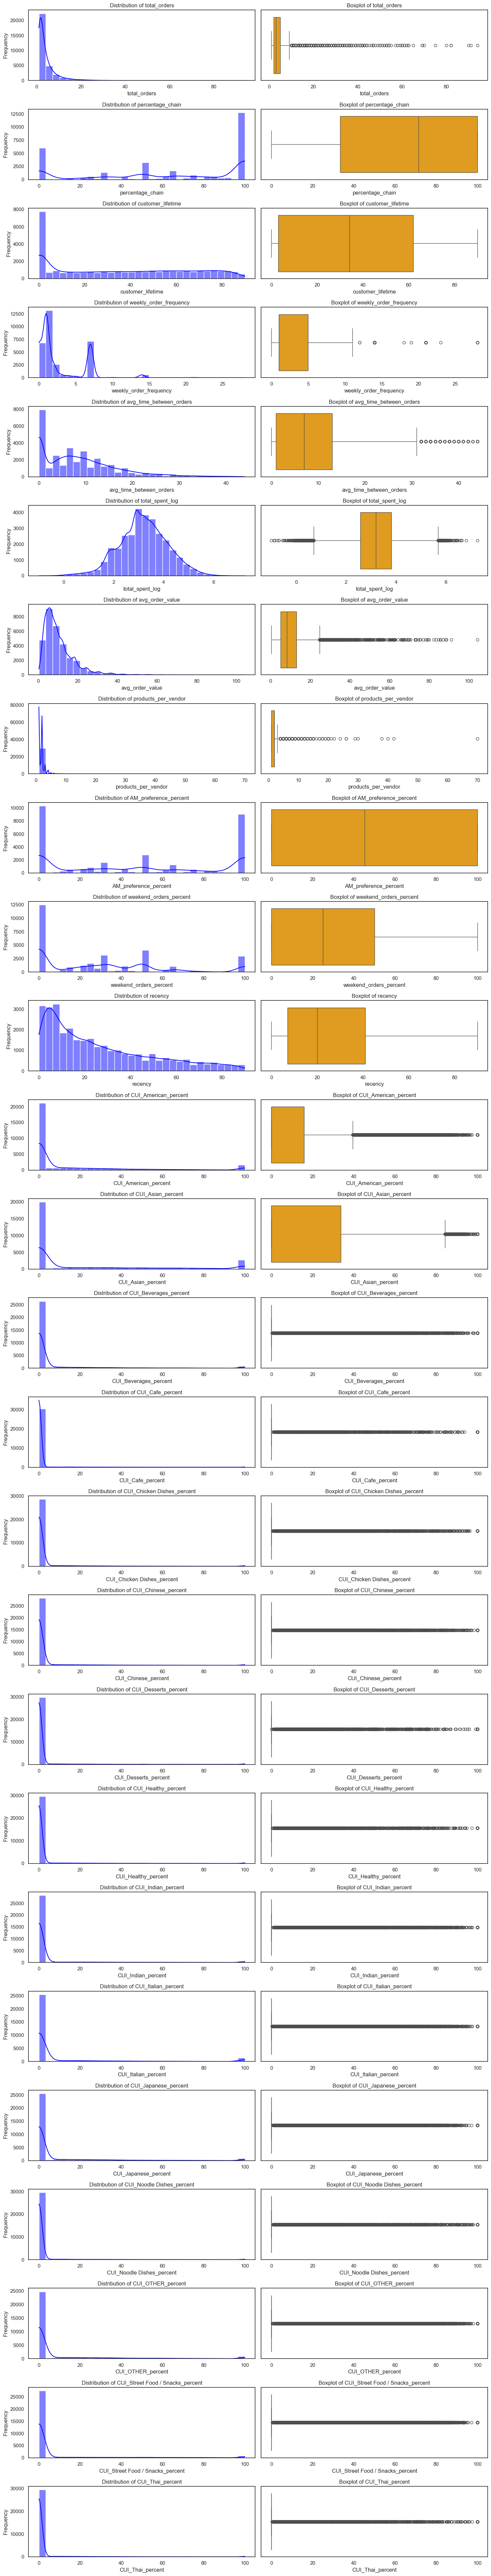

In [149]:
plot_distribution_and_boxplot(df,new_features_numerical)

<h3 id='categorical-new'> 3.4.2 Categorical new features</h3>

In [150]:
df["active_customer"] = np.where((df.last_order >= 60), True, False)
df["recent_customer"] = np.where((df.first_order >= 60), True, False)
df["churning_customer"] = np.where((df.last_order < 60), True, False)

df["customer_activity"] = np.where((df.churning_customer == True), "Churning",
                                   np.where((df.recent_customer == True), "Recent", "Active"))
df.drop(columns=["active_customer", "recent_customer", "churning_customer"], inplace=True)


In [151]:
new_features_categorical = ['customer_activity']

In [152]:
new_cat_cols = cat_cols + new_features_categorical

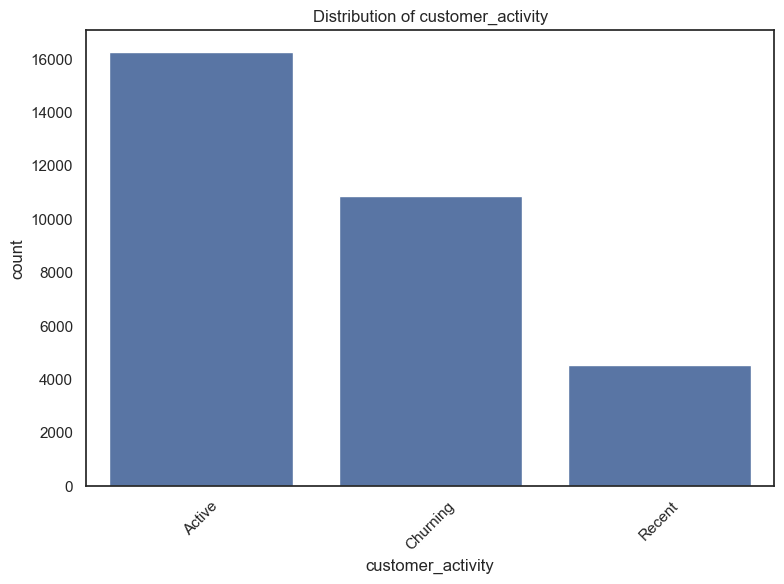

In [153]:
plot_categorical_distributions(df,new_features_categorical)

<h2>3.5 Skewness of Data</h2>

> As we can see, our variables are highly skewed. Let's check

In [154]:
# Remove columns with "percent" in their names
new_num_cols_without_percent = [col for col in new_num_cols if "percent" not in col.lower()]

print(new_num_cols_without_percent)


['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'total_orders', 'customer_lifetime', 'weekly_order_frequency', 'avg_time_between_orders', 'total_spent_log', 'avg_order_value', 'products_per_vendor', 'recency']


products_per_vendor        10.220047
product_count               5.717809
is_chain                    4.985804
total_orders                4.540797
vendor_count                3.027450
avg_order_value             2.437983
weekly_order_frequency      1.657977
customer_age                1.567175
avg_time_between_orders     1.114304
recency                     0.934679
first_order                 0.758056
customer_lifetime           0.200049
total_spent_log            -0.086268
last_order                 -0.934679
dtype: float64
Features with skewness above 2: ['products_per_vendor', 'product_count', 'is_chain', 'total_orders', 'vendor_count', 'avg_order_value', 'weekly_order_frequency', 'customer_age']


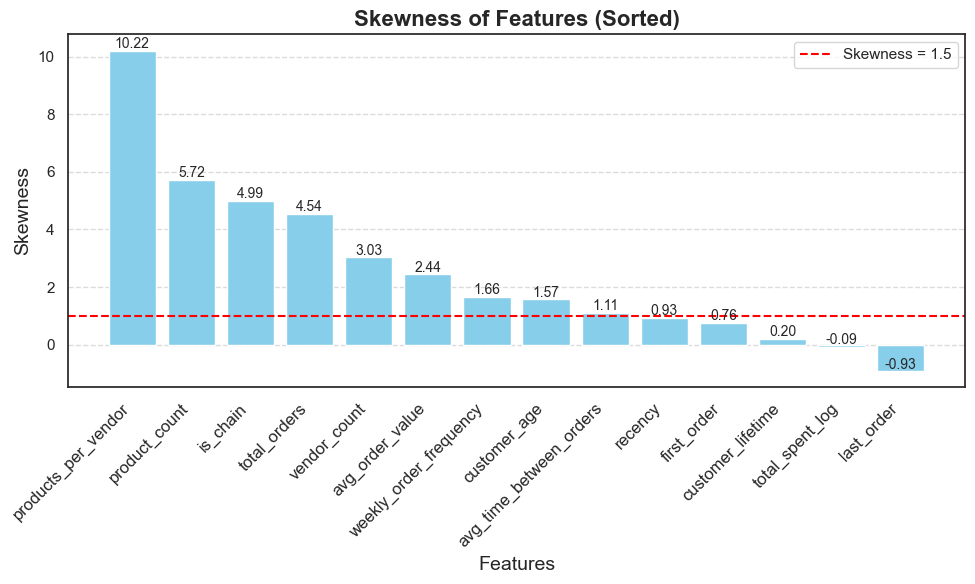

In [155]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate skewness for each feature
skewness = df[new_num_cols_without_percent].apply(lambda x: skew(x, nan_policy='omit'))

# Sort skewness in descending order
sorted_skewness = skewness.sort_values(ascending=False)

# Print sorted skewness values
print(sorted_skewness)

# Save the features with skewness above 2 in a list
high_skew_features = sorted_skewness[sorted_skewness > 1.5].index.tolist()
print(f"Features with skewness above 2: {high_skew_features}")

# Create a bar plot of sorted skewness values
plt.figure(figsize=(10, 6))

# Plot the skewness bars
bars = plt.bar(sorted_skewness.index, sorted_skewness, color='skyblue')

# Add a horizontal line at y = 1 for better visualization
plt.axhline(y=1, color='red', linestyle='--', label="Skewness = 1.5")

# Adding title, labels, and other customizations
plt.title("Skewness of Features (Sorted)", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Skewness", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optionally, add annotations to show exact skewness values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

# Add grid and legends
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


> For the ones with skewness above 2 we will log transform

In [156]:
for column in high_skew_features:
    df[f'{column}_log'] = np.log1p(df[column])

In [157]:
high_skew_features

['products_per_vendor',
 'product_count',
 'is_chain',
 'total_orders',
 'vendor_count',
 'avg_order_value',
 'weekly_order_frequency',
 'customer_age']

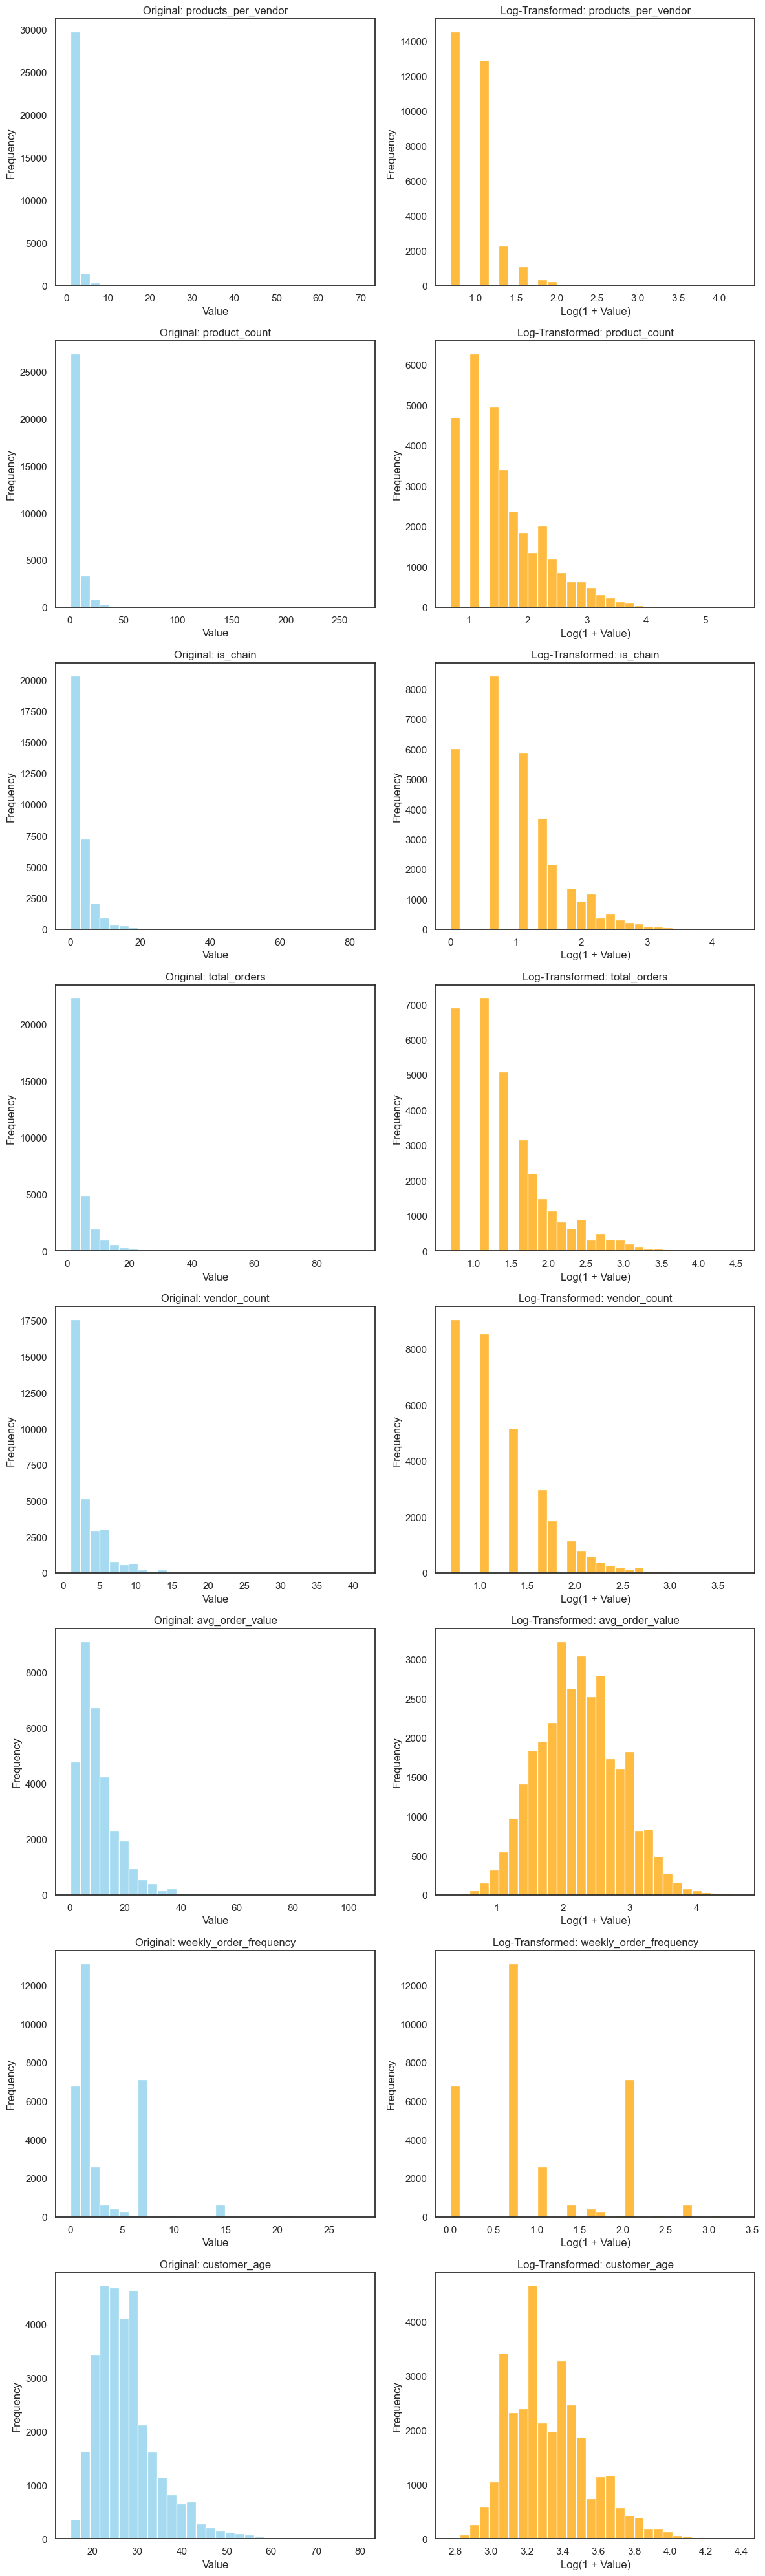

In [158]:
num_features = len(high_skew_features)

num_rows = (num_features * 2 + 1) // 2  
num_cols = 2 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(high_skew_features):
    if i * 2 < len(axes):  # Ensure there are enough axes
        # Plot original column histogram
        sns.histplot(df[column], kde=False, ax=axes[i * 2], color='skyblue', bins=30)
        axes[i * 2].set_title(f"Original: {column}")
        axes[i * 2].set_xlabel("Value")
        axes[i * 2].set_ylabel("Frequency")
        
        # Plot log-transformed column histogram
        sns.histplot(df[f'{column}_log'], kde=False, ax=axes[i * 2 + 1], color='orange', bins=30)
        axes[i * 2 + 1].set_title(f"Log-Transformed: {column}")
        axes[i * 2 + 1].set_xlabel("Log(1 + Value)")
        axes[i * 2 + 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [159]:
original_skewness = df[high_skew_features].apply(lambda x: skew(x, nan_policy='omit'))

log_skewness = df[[f'{column}_log' for column in high_skew_features]].apply(lambda x: skew(x, nan_policy='omit'))

skew_comparison_original = pd.DataFrame({
    'Skewness': original_skewness
})

skew_comparison_log = pd.DataFrame({
    'Skewness after log': log_skewness
})

skew_comparison_original.reset_index(inplace=True)
skew_comparison_log.reset_index(inplace=True)

skew_comparison_original.rename(columns={'index': 'Feature'}, inplace=True)
skew_comparison_log.rename(columns={'index': 'Feature log'}, inplace=True)

skew_comparison = pd.concat([skew_comparison_original, skew_comparison_log], axis=1)

skew_comparison.drop(columns=['Feature log'], inplace=True)

skew_comparison


Feature   Skewness  Skewness after log
0     products_per_vendor  10.220047            1.437523
1           product_count   5.717809            0.767075
2                is_chain   4.985804            0.472677
3            total_orders   4.540797            0.879852
4            vendor_count   3.027450            0.824122
5         avg_order_value   2.437983            0.158961
6  weekly_order_frequency   1.657977            0.507341
7            customer_age   1.567175            0.692202

In [160]:
new_num_cols_transformed = [col for col in new_num_cols if col not in high_skew_features]

In [161]:
new_num_cols_transformed += ['products_per_vendor_log',
       'product_count_log', 'is_chain_log',
       'total_orders_log', 'vendor_count_log', 'avg_order_value_log','customer_age_log','weekly_order_frequency_log']

In [162]:
new_num_cols_transformed

['first_order',
 'last_order',
 'percentage_chain',
 'customer_lifetime',
 'avg_time_between_orders',
 'total_spent_log',
 'AM_preference_percent',
 'weekend_orders_percent',
 'recency',
 'CUI_American_percent',
 'CUI_Asian_percent',
 'CUI_Beverages_percent',
 'CUI_Cafe_percent',
 'CUI_Chicken Dishes_percent',
 'CUI_Chinese_percent',
 'CUI_Desserts_percent',
 'CUI_Healthy_percent',
 'CUI_Indian_percent',
 'CUI_Italian_percent',
 'CUI_Japanese_percent',
 'CUI_Noodle Dishes_percent',
 'CUI_OTHER_percent',
 'CUI_Street Food / Snacks_percent',
 'CUI_Thai_percent',
 'products_per_vendor_log',
 'product_count_log',
 'is_chain_log',
 'total_orders_log',
 'vendor_count_log',
 'avg_order_value_log',
 'customer_age_log',
 'weekly_order_frequency_log']

<h2> 3.6 Outlier Removal with Transformed Outliers</h2>

In [163]:
df_transformed = df.copy()

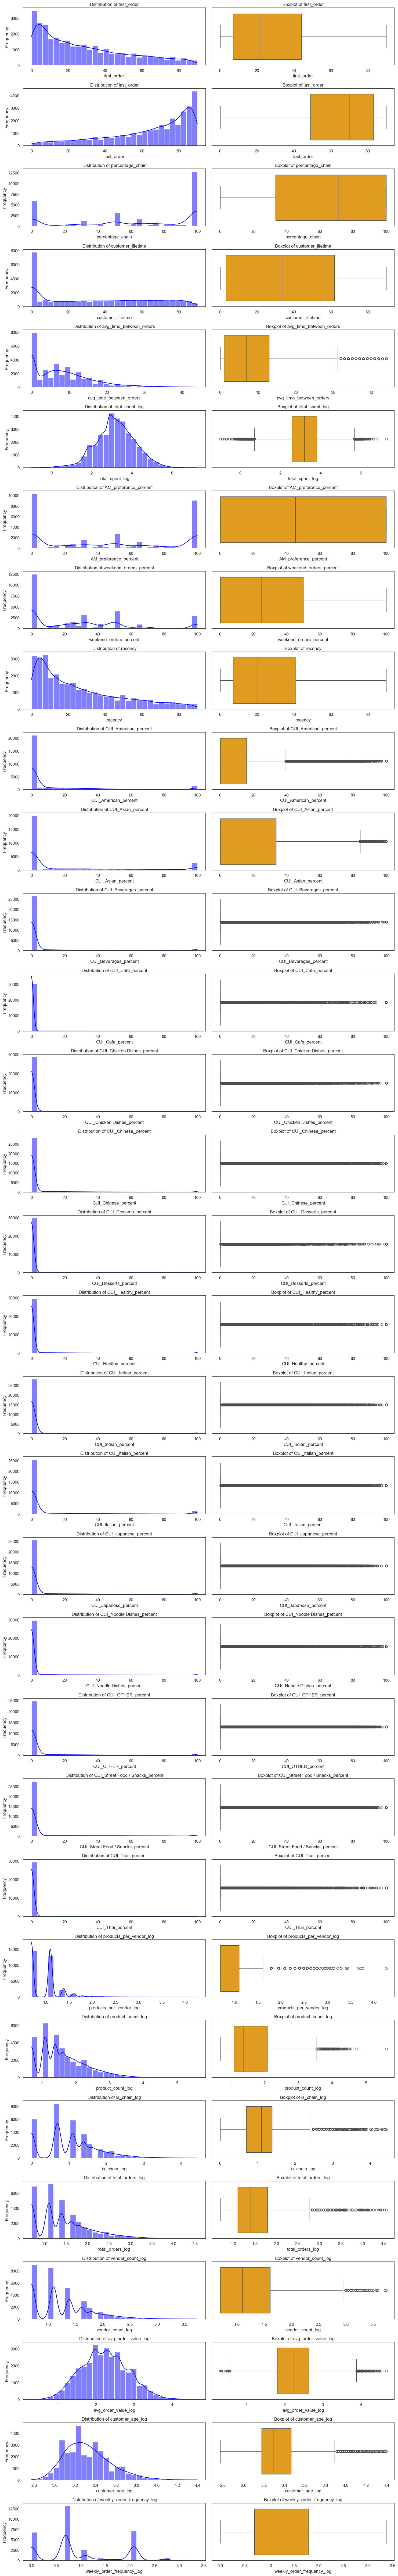

In [164]:
plot_distribution_and_boxplot(df,new_num_cols_transformed)

<h3>3.6.1 Outlier Removal of Existing Variables</h3>

In [165]:
columns_with_outliers = ['customer_age','vendor_count_log','product_count_log','is_chain_log']

In [166]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(df_transformed,columns_with_outliers,2)

Columns with right outliers (percentile): ['customer_age', 'is_chain_log']
Columns with right outliers (IQR): ['vendor_count_log', 'product_count_log']
Columns with left outliers (IQR): []
Columns with left outliers (percentile): []


In [167]:
df_transformed_wo_outliers = remove_outliers_iqr(df_transformed,right_iqr,2)

Upper Bound for vendor_count_log: 3.4420193761824103
Lower Bound for vendor_count_log: -1.1394342831883648
--------------------------------------------------
Upper Bound for product_count_log: 4.041100047703288
Lower Bound for product_count_log: -0.8630462173553421
--------------------------------------------------
Rows removed for each:{'vendor_count_log': 8, 'product_count_log': 66}
Total removed:74
Percentage removed:0.2335%


In [168]:
df_transformed_wo_outliers = remove_outliers_percentile(df_transformed_wo_outliers,right_perc,0,99)

Upper Bound for customer_age: 52.0
Lower Bound for customer_age: 15.0
--------------------------------------------------
Upper Bound for is_chain_log: 2.9444389791664403
Lower Bound for is_chain_log: 0.0
--------------------------------------------------
Rows removed for each: {'customer_age': 272, 'is_chain_log': 264}
Total removed: 536
Percentage removed: 1.6953%


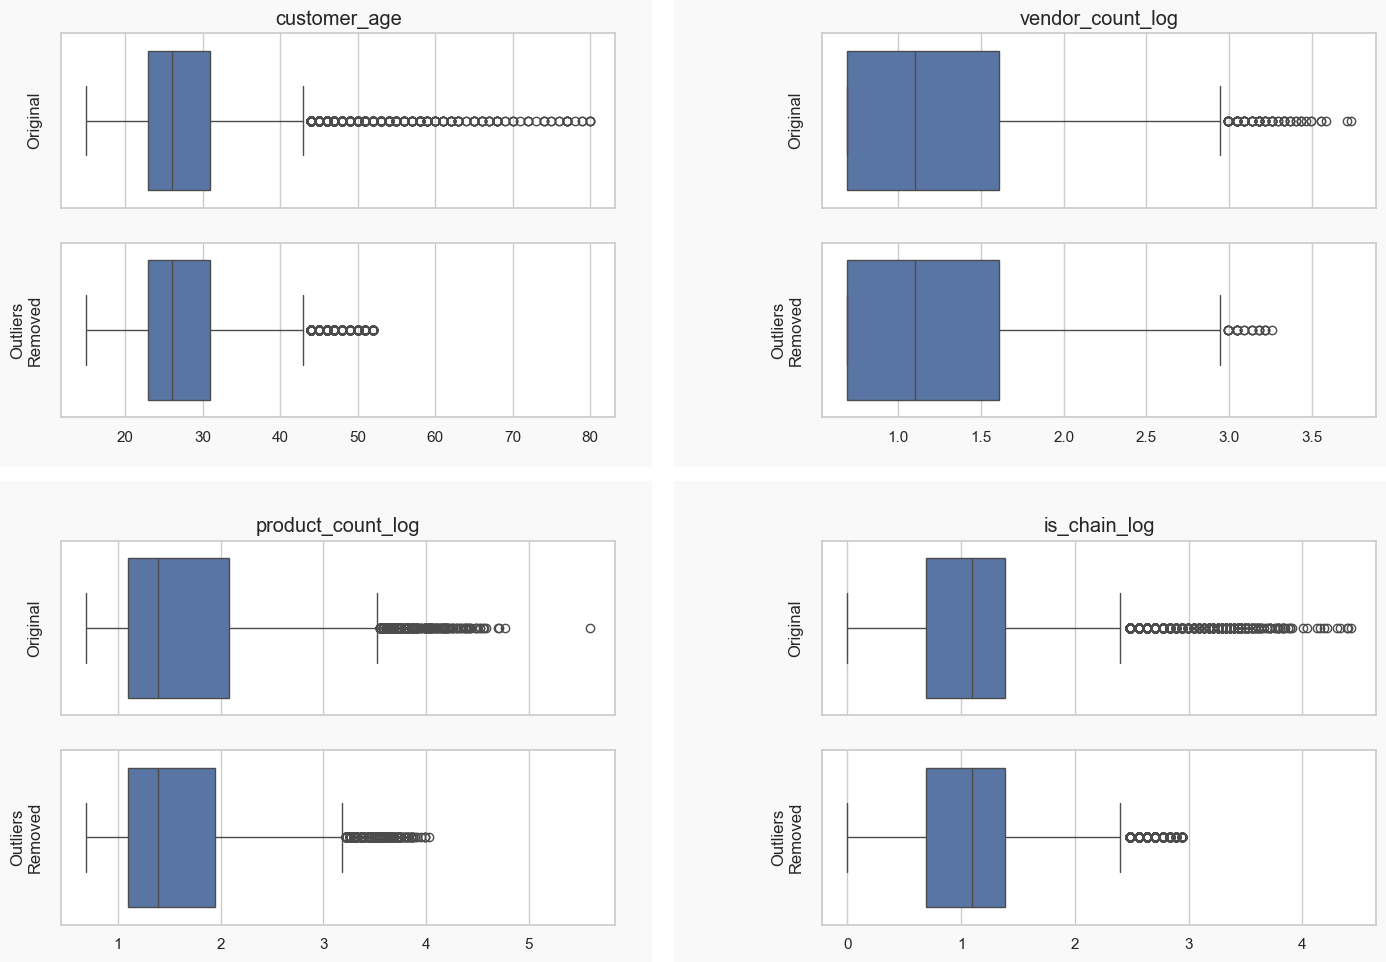

In [169]:
compare_figure_outliers(df_transformed,df_transformed_wo_outliers,columns_with_outliers)

<h3>3.6.2 Outlier Removal of New Variables</h3>

In [170]:
new_columns_with_outliers = ['total_orders_log',
                          'weekly_order_frequency',
                          'avg_time_between_orders',
                          'total_spent_log',
                          'avg_order_value_log',
                          'products_per_vendor_log']


> Total orders log seems to be ok, the rest we will still demove.

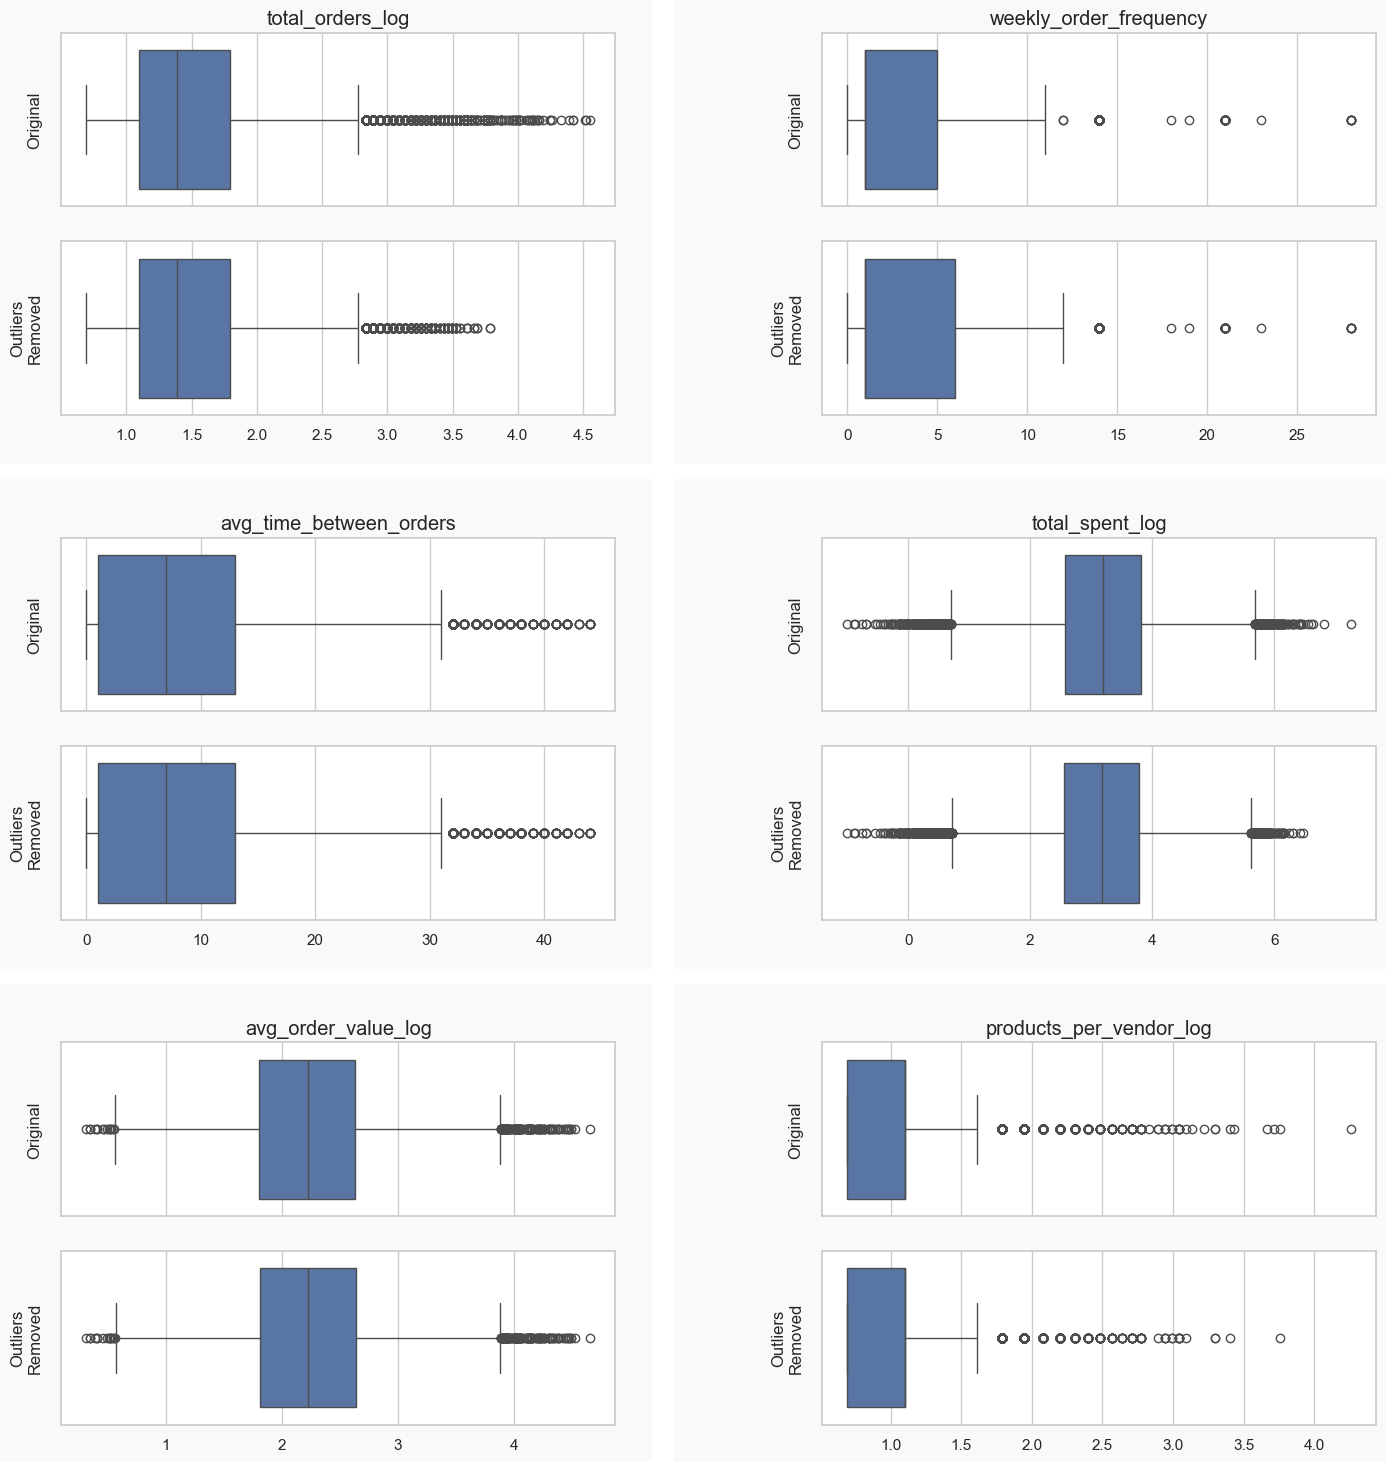

In [171]:
compare_figure_outliers(df_transformed,df_transformed_wo_outliers,new_columns_with_outliers)

In [172]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(df_transformed_wo_outliers,new_columns_with_outliers,2)

Columns with right outliers (percentile): ['products_per_vendor_log']
Columns with right outliers (IQR): ['total_orders_log', 'weekly_order_frequency', 'avg_time_between_orders', 'total_spent_log', 'avg_order_value_log']
Columns with left outliers (IQR): ['total_spent_log']
Columns with left outliers (percentile): []


In [173]:
df_transformed_wo_outliers=remove_outliers_iqr(df_transformed_wo_outliers,right_iqr,2)

Upper Bound for total_orders_log: 3.1780538303479453
Lower Bound for total_orders_log: -0.28768207245178057
--------------------------------------------------
Upper Bound for weekly_order_frequency: 19.0
Lower Bound for weekly_order_frequency: -11.0
--------------------------------------------------
Upper Bound for avg_time_between_orders: 37.0
Lower Bound for avg_time_between_orders: -23.0
--------------------------------------------------
Upper Bound for total_spent_log: 6.221081214486304
Lower Bound for total_spent_log: 0.11174843352440433
--------------------------------------------------
Upper Bound for avg_order_value_log: 4.2993416958967545
Lower Bound for avg_order_value_log: 0.15576345264903035
--------------------------------------------------
Rows removed for each:{'total_orders_log': 151, 'weekly_order_frequency': 48, 'avg_time_between_orders': 153, 'total_spent_log': 66, 'avg_order_value_log': 23}
Total removed:441
Percentage removed:1.4189%


In [174]:
df_transformed_wo_outliers=remove_outliers_percentile(df_transformed_wo_outliers,right_perc,0,99)

Upper Bound for products_per_vendor_log: 1.9459101490553132
Lower Bound for products_per_vendor_log: 0.6931471805599453
--------------------------------------------------
Rows removed for each: {'products_per_vendor_log': 264}
Total removed: 264
Percentage removed: 0.8616%


> Check how many were dropped

In [175]:
(df_transformed.shape[0]-df_transformed_wo_outliers.shape[0])/df_transformed.shape[0]*100

4.149573998106659

>  Remove a total from 4.1496% of the data. 

<h2>3.6 Outlier Removal</h2>

> Let's take a look at the numerical columns:

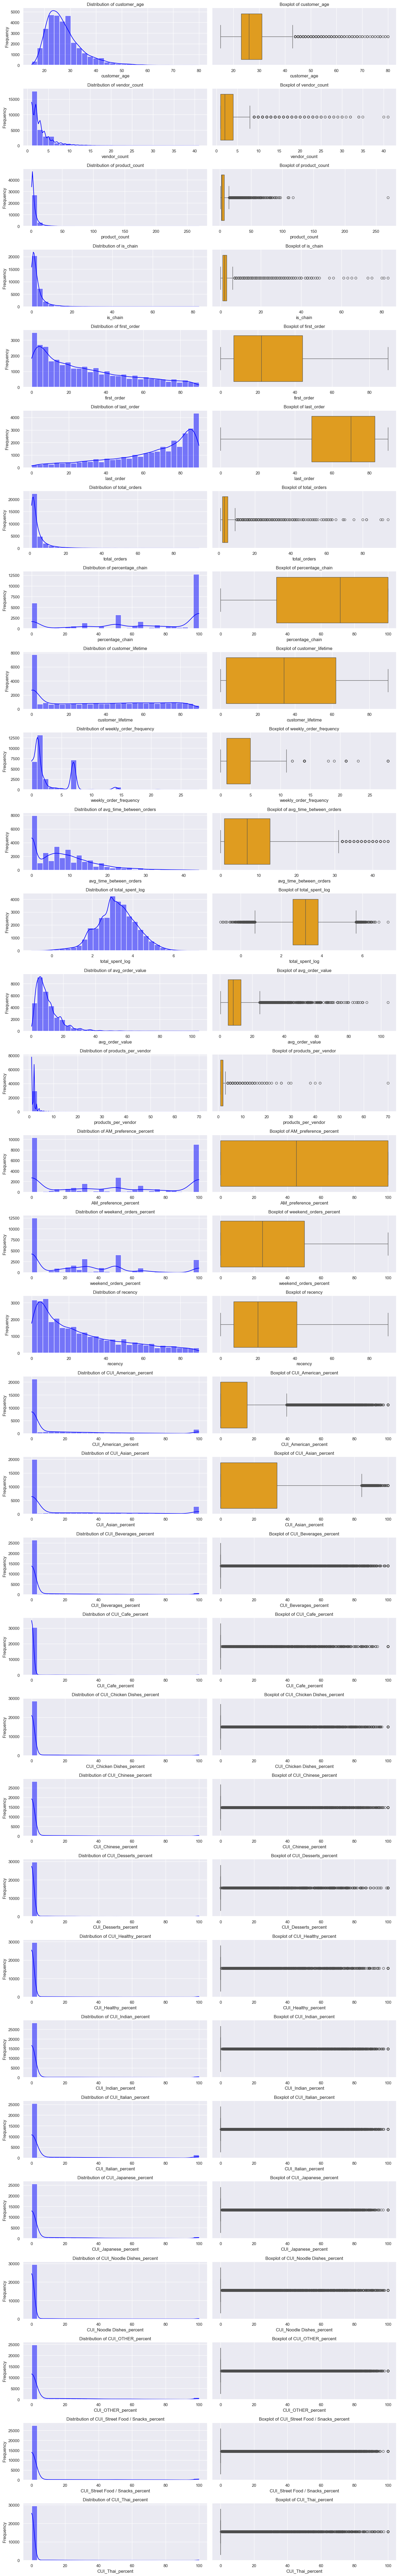

In [176]:
plot_distribution_and_boxplot(df,new_num_cols)

> Originally, we seem to have outliers in customer_ge,vendor_count,product_count,is_chain, total_orders, weekly_order_frequency, avg_time_between_orders, total_spent_log, avg_order_value, products_per_vendor.

> __make a table for these outliers__

In [177]:
df_before_outliers = df.shape[0]

<h3>3.5.1 Outlier Removal of Existing Variables</h3>

> Let's first remove the outliers of the existing numerical variables, that is: customer_age, vendor_count, product_count,is_chain

In [178]:
columns_with_outliers = ['customer_age','vendor_count','product_count','is_chain']

In [179]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(df,columns_with_outliers)

Columns with right outliers (percentile): ['vendor_count', 'product_count', 'is_chain']
Columns with right outliers (IQR): ['customer_age']
Columns with left outliers (IQR): []
Columns with left outliers (percentile): []


In [180]:
df_after_outlier = remove_outliers_percentile(df,['vendor_count', 'product_count', 'is_chain'],0,99)

Upper Bound for vendor_count: 14.0
Lower Bound for vendor_count: 1.0
--------------------------------------------------
Upper Bound for product_count: 29.0
Lower Bound for product_count: 1.0
--------------------------------------------------
Upper Bound for is_chain: 14.0
Lower Bound for is_chain: 0.0
--------------------------------------------------
Rows removed for each: {'vendor_count': 268, 'product_count': 269, 'is_chain': 251}
Total removed: 788
Percentage removed: 2.4866%


In [181]:
df_after_outlier = remove_outliers_iqr(df_after_outlier,['customer_age'],3)

Upper Bound for customer_age: 55.0
Lower Bound for customer_age: -1.0
--------------------------------------------------
Rows removed for each:{'customer_age': 151}
Total removed:151
Percentage removed:0.4886%


> Let's see how it looks.

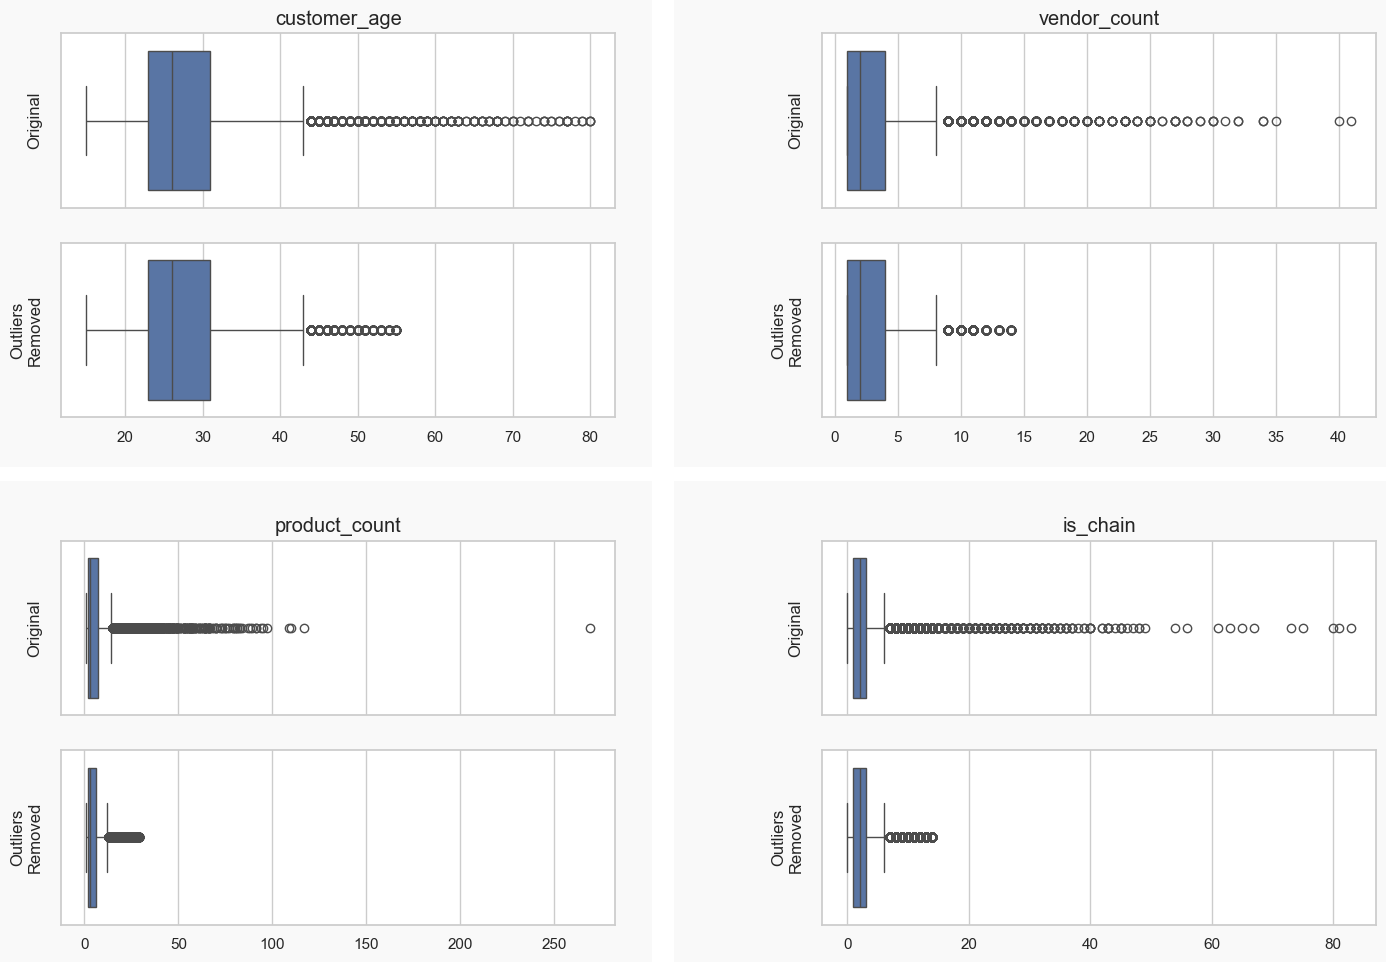

In [182]:
compare_figure_outliers(df,df_after_outlier,columns_with_outliers)

<h3>3.5.2 Outlier Removal of New Variables</h3>

> Before proceeding, we should check if removing outliers from the original brought any changes to out new features.

In [183]:
# All columns that we should look into removing outliers
new_columns_with_outliers = ['total_orders',
                          'weekly_order_frequency',
                          'avg_time_between_orders',
                          'total_spent_log',
                          'avg_order_value',
                          'products_per_vendor']


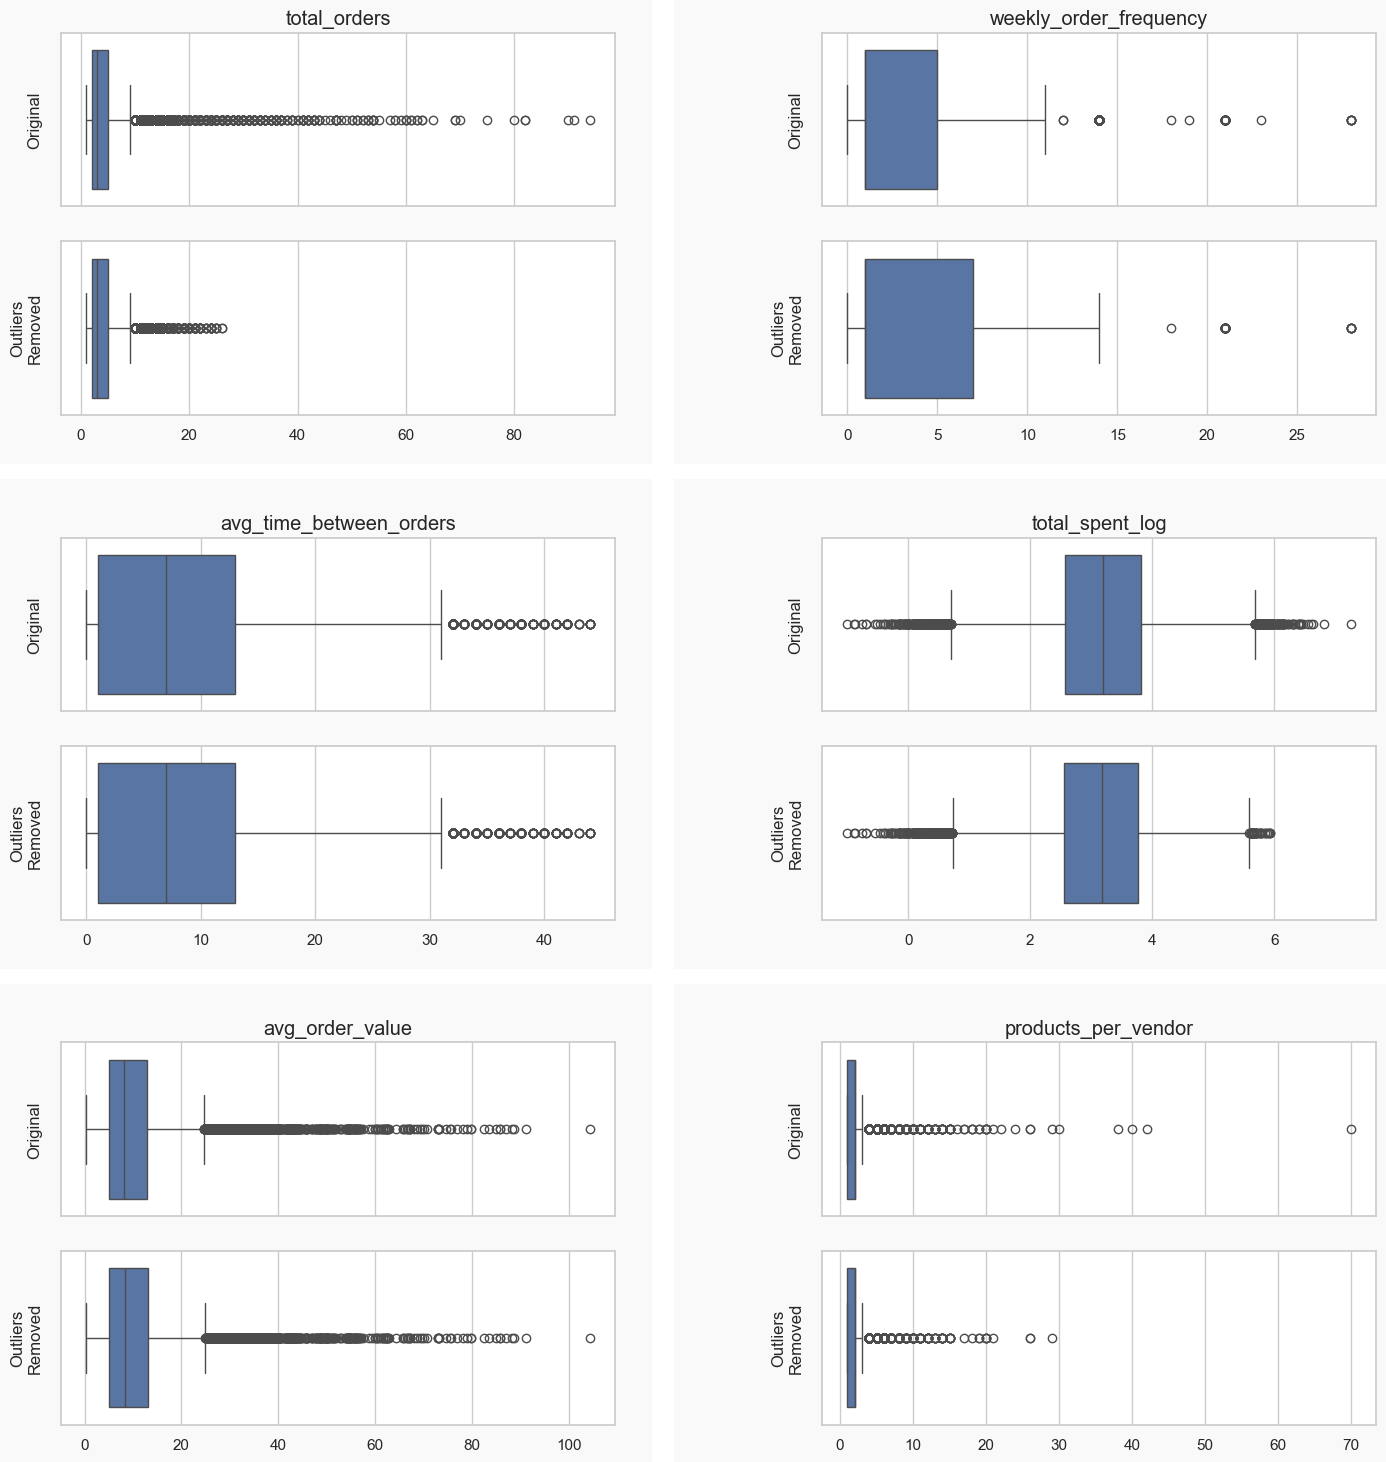

In [184]:
compare_figure_outliers(df,df_after_outlier,new_columns_with_outliers)

In [185]:
new_columns_with_outliers = ['weekly_order_frequency',
                          'avg_time_between_orders',
                          'total_spent_log',
                          'avg_order_value',
                          'products_per_vendor']

> We can see that mainly it made changes to total_orders. But still should look into outliers in weekly_order_frequency, avg_time_between_orders,total_spent_log, avg_order_value and products_per_vendor.

In [186]:
from scipy.stats import skew

# Check skewness

skewness = df[new_columns_with_outliers].apply(lambda x: skew(x, nan_policy='omit'))
print(skewness)


weekly_order_frequency      1.657977
avg_time_between_orders     1.114304
total_spent_log            -0.086268
avg_order_value             2.437983
products_per_vendor        10.220047
dtype: float64


> Given how skewed avg_order_value and products_per_vendor is: we will use 99.9 percentile.

In [187]:
df_after_new_outlier = remove_outliers_percentile(df_after_outlier,['avg_order_value', 'products_per_vendor'],0,99.9)

Upper Bound for avg_order_value: 67.09250000000033
Lower Bound for avg_order_value: 0.37
--------------------------------------------------
Upper Bound for products_per_vendor: 13.0
Lower Bound for products_per_vendor: 1.0
--------------------------------------------------
Rows removed for each: {'avg_order_value': 31, 'products_per_vendor': 27}
Total removed: 58
Percentage removed: 0.1886%


> For weekly_order_frequency and avg_time_between_orders we will use 99 percentile

In [188]:
df_after_new_outlier = remove_outliers_percentile(df_after_new_outlier,['weekly_order_frequency','avg_time_between_orders'],0,99)

Upper Bound for weekly_order_frequency: 14.0


Lower Bound for weekly_order_frequency: 0.0
--------------------------------------------------
Upper Bound for avg_time_between_orders: 34.0
Lower Bound for avg_time_between_orders: 0.0
--------------------------------------------------
Rows removed for each: {'weekly_order_frequency': 47, 'avg_time_between_orders': 257}
Total removed: 304
Percentage removed: 0.9905%


> Finally, given that total_spent_log is somewhat normally distributed we will use z-score.

In [189]:
df_after_new_outlier=remove_outliers_zscore(df_after_new_outlier,'total_spent_log')

Total outliers in column total_spent_log: 139
Lower bound: 0.348885063245429
Upper bound: 5.938113452567206
Percentage of data removed: 0.4574%


> In total, we have removed 4.544% of the data with cleansing.

In [190]:
(df.shape[0] - df_after_new_outlier.shape[0])/df.shape[0]*100

4.544020195645314

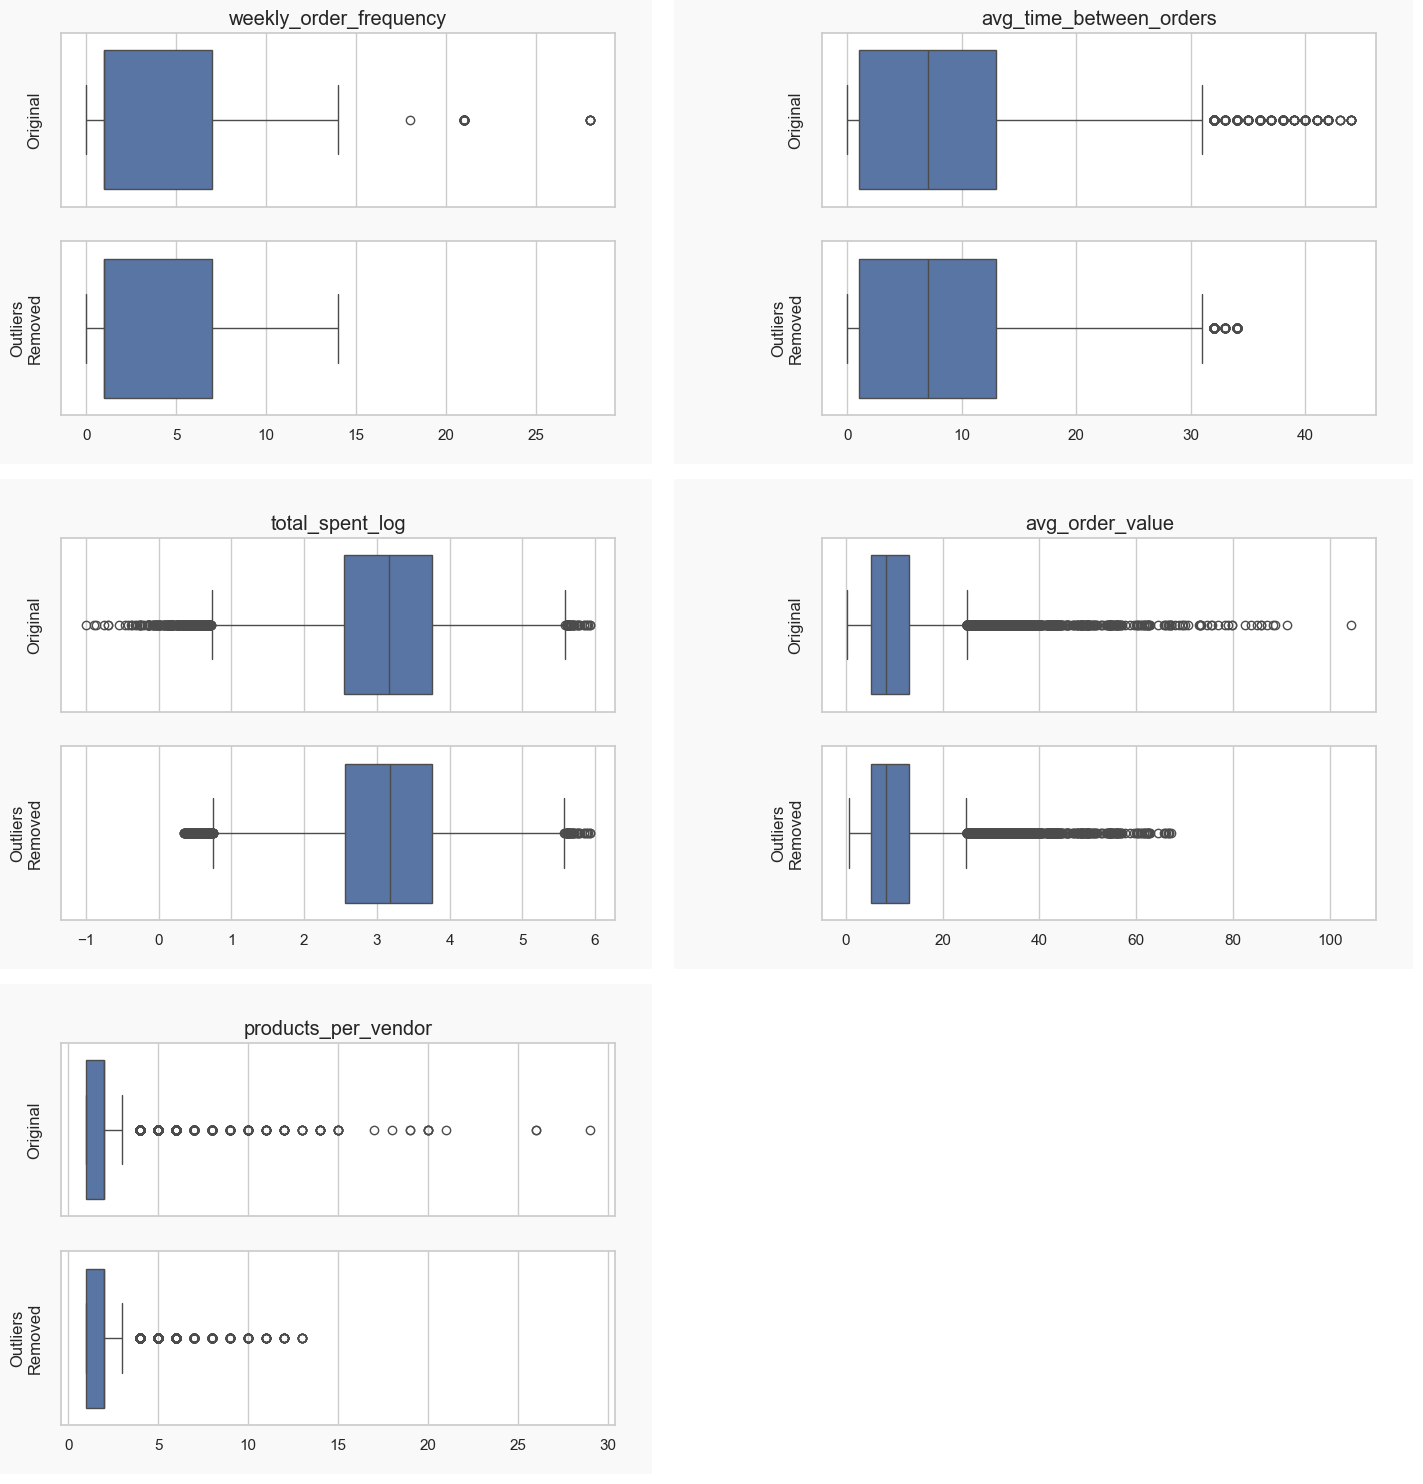

In [191]:
compare_figure_outliers(df_after_outlier,df_after_new_outlier,new_columns_with_outliers)

<h2>3.6 Scaling</h2>

> df_after_outlier and df_transformed_wo_outliers

<h3>3.6.1 Scaling without log transformation</h3>

In [192]:
df_after_outlier[new_num_cols].head(5)

customer_age  vendor_count  product_count  is_chain  first_order  \
customer_id                                                                     
1b8f824d5e             18             2              5         1            0   
5d272b9dcb             17             2              2         2            0   
f6d1b2ba63             38             1              2         2            0   
180c632ed8             25             2              3         1            0   
4eb37a6705             20             2              5         0            0   

             last_order  total_orders  percentage_chain  customer_lifetime  \
customer_id                                                                  
1b8f824d5e            1             2              50.0                  1   
5d272b9dcb            1             2             100.0                  1   
f6d1b2ba63            1             2             100.0                  1   
180c632ed8            2             2              50.0                  2   
4eb37a6705            2             2               0.0                  2   

             weekly_order_frequency  ...  CUI_Chinese_percent  \
customer_id                          ...                        
1b8f824d5e                     14.0  ...                  0.0   
5d272b9dcb                     14.0  ...                  0.0   
f6d1b2ba63                     14.0  ...                  0.0   
180c632ed8                      7.0  ...                  0.0   
4eb37a6705                      7.0  ...                  0.0   

             CUI_Desserts_percent  CUI_Healthy_percent  CUI_Indian_percent  \
customer_id                                                                  
1b8f824d5e                    0.0                  0.0          100.000000   
5d272b9dcb                    0.0                  0.0            0.000000   
f6d1b2ba63                    0.0                  0.0            0.000000   
180c632ed8                    0.0                  0.0           56.590621   
4eb37a6705                    0.0                  0.0            0.000000   

             CUI_Italian_percent  CUI_Japanese_percent  \
customer_id                                              
1b8f824d5e                   0.0                   0.0   
5d272b9dcb                   0.0                   0.0   
f6d1b2ba63                   0.0                   0.0   
180c632ed8                   0.0                   0.0   
4eb37a6705                   0.0                   0.0   

             CUI_Noodle Dishes_percent  CUI_OTHER_percent  \
customer_id                                                 
1b8f824d5e                         0.0                0.0   
5d272b9dcb                         0.0                0.0   
f6d1b2ba63                         0.0                0.0   
180c632ed8                         0.0                0.0   
4eb37a6705                         0.0                0.0   

             CUI_Street Food / Snacks_percent  CUI_Thai_percent  
customer_id                                                      
1b8f824d5e                                0.0               0.0  
5d272b9dcb                                0.0               0.0  
f6d1b2ba63                                0.0               0.0  
180c632ed8                                0.0               0.0  
4eb37a6705                                0.0               0.0  

[5 rows x 32 columns]

> We will use Standard Scaler for the numerical variables

In [193]:
df_scaled = df_after_outlier.copy()


In [194]:
# Apply StandardScaler to all Numericals
scaler = StandardScaler()

df_scaled[new_num_cols] = scaler.fit_transform(df_scaled[new_num_cols])

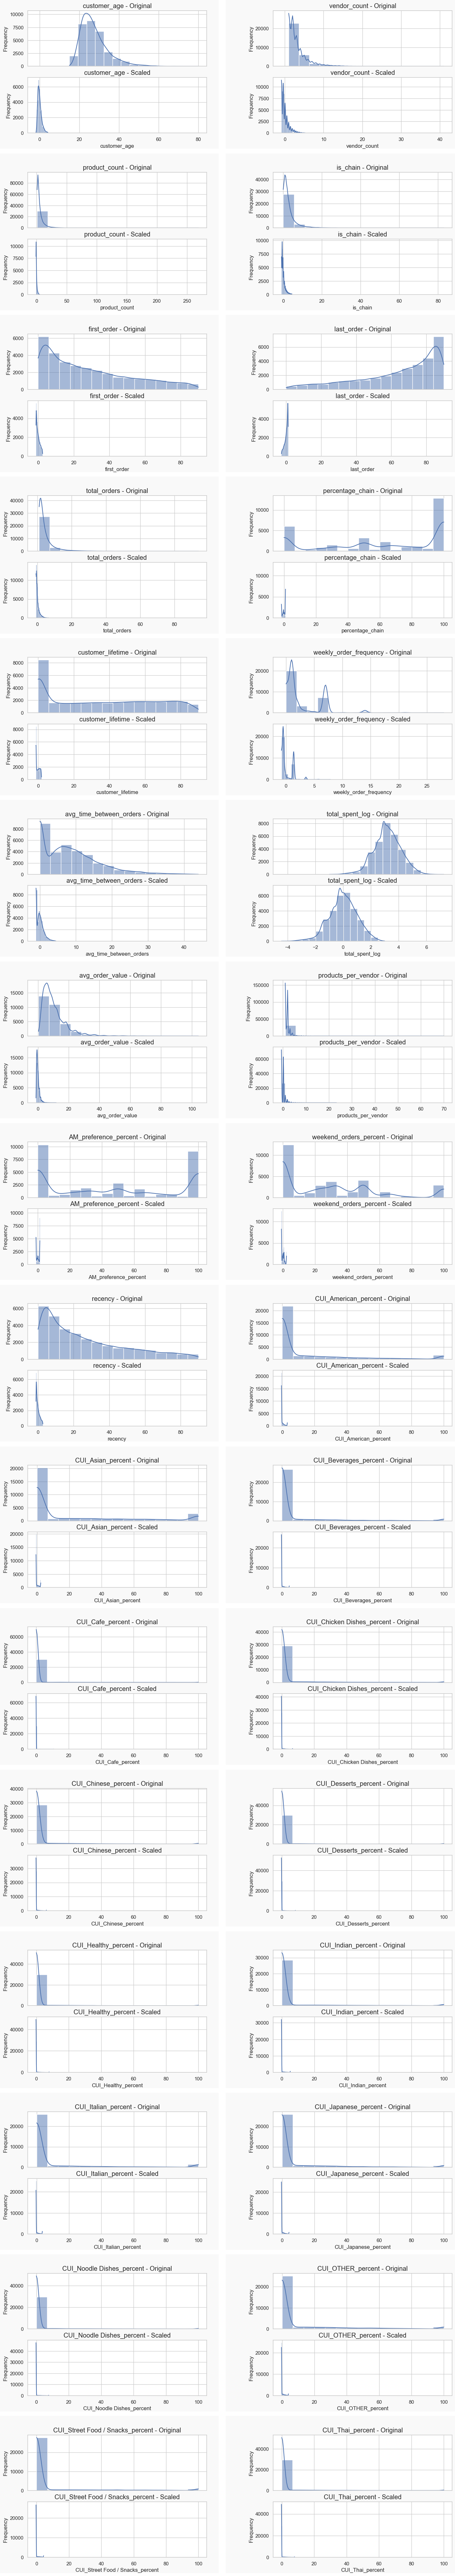

In [195]:
compare_figure_scaling_histograms(df,df_scaled,new_num_cols)

<h3>3.6.2 Scaling with log transformation</h3>

In [196]:
df_log_scaled = df_transformed_wo_outliers.copy()

df_log_scaled[new_num_cols_transformed] = scaler.fit_transform(df_log_scaled[new_num_cols_transformed])

<h2>3.7 One Hot Encoding</h2>

> Use this instead of scikit learns one hot encoding bnecause we want something simple.

In [197]:
df_encoded = pd.get_dummies(df_scaled, columns=new_cat_cols)
df_log_encoded = pd.get_dummies(df_log_scaled, columns=new_cat_cols)
df_encoded

customer_age  vendor_count  product_count  is_chain  first_order  \
customer_id                                                                     
1b8f824d5e      -1.404041     -0.406257       0.011232 -0.550936    -1.201056   
5d272b9dcb      -1.554398     -0.406257      -0.657717 -0.160904    -1.201056   
f6d1b2ba63       1.603113     -0.871765      -0.657717 -0.160904    -1.201056   
180c632ed8      -0.351537     -0.406257      -0.434734 -0.550936    -1.201056   
4eb37a6705      -1.103325     -0.406257       0.011232 -0.940969    -1.201056   
...                   ...           ...            ...       ...          ...   
f4e366c281       0.400251     -0.871765      -0.880700 -0.550936    -1.201056   
f6b6709018      -0.501895     -0.871765      -0.880700 -0.940969    -1.201056   
f74ad8ce3f      -0.501895     -0.871765      -0.880700 -0.550936    -1.201056   
f7b19c0241       1.001682     -0.871765      -0.880700 -0.940969    -1.201056   
fd40d3b0e0       0.400251     -0.871765      -0.880700 -0.940969    -1.201056   

             last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                                 
1b8f824d5e    -2.679865          0.00       0.00           0.00       0.0   
5d272b9dcb    -2.679865         12.82       6.39           0.00       0.0   
f6d1b2ba63    -2.679865          9.20       0.00           0.00       0.0   
180c632ed8    -2.636782          0.00      13.70           0.00       0.0   
4eb37a6705    -2.636782         14.57      40.87           0.00       0.0   
...                 ...           ...        ...            ...       ...   
f4e366c281    -2.722949          0.00       0.00          18.04       0.0   
f6b6709018    -2.722949         18.04       0.00           0.00       0.0   
f74ad8ce3f    -2.722949          0.00       0.00           0.00       0.0   
f7b19c0241    -2.722949          0.00      12.03           0.00       0.0   
fd40d3b0e0    -2.722949          0.00       0.00           0.00       0.0   

             ...  last_promo_DELIVERY  last_promo_DISCOUNT  \
customer_id  ...                                             
1b8f824d5e   ...                 True                False   
5d272b9dcb   ...                False                 True   
f6d1b2ba63   ...                False                 True   
180c632ed8   ...                 True                False   
4eb37a6705   ...                False                False   
...          ...                  ...                  ...   
f4e366c281   ...                False                False   
f6b6709018   ...                 True                False   
f74ad8ce3f   ...                False                False   
f7b19c0241   ...                False                 True   
fd40d3b0e0   ...                False                False   

             last_promo_FREEBIE  last_promo_NO PROMO  payment_method_CARD  \
customer_id                                                                 
1b8f824d5e                False                False                False   
5d272b9dcb                False                False                False   
f6d1b2ba63                False                False                False   
180c632ed8                False                False                False   
4eb37a6705                False                 True                False   
...                         ...                  ...                  ...   
f4e366c281                 True                False                False   
f6b6709018                False                False                False   
f74ad8ce3f                False                 True                False   
f7b19c0241                False                False                False   
fd40d3b0e0                False                 True                False   

             payment_method_CASH  payment_method_DIGI  \
customer_id                                             
1b8f824d5e                 False  

In [198]:
new_cat_cols = df_encoded.select_dtypes(include='bool').columns.tolist()

In [199]:
new_cat_cols

['customer_region_2360',
 'customer_region_2440',
 'customer_region_2490',
 'customer_region_4140',
 'customer_region_4660',
 'customer_region_8370',
 'customer_region_8550',
 'customer_region_8670',
 'last_promo_DELIVERY',
 'last_promo_DISCOUNT',
 'last_promo_FREEBIE',
 'last_promo_NO PROMO',
 'payment_method_CARD',
 'payment_method_CASH',
 'payment_method_DIGI',
 'customer_activity_Active',
 'customer_activity_Churning',
 'customer_activity_Recent']

<h1 id='multivariate'>4. Feature Selection</h1>

<h2>4.1 Without Log Transformation </h2>

In [200]:
cor_spearman = df_encoded[new_num_cols].corr(method='spearman')

correlation_pairs = cor_spearman.unstack().reset_index()

correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter the table for correlations > 0.8 or < -0.8 and exclude self-correlations
strong_correlations = correlation_pairs[
    ((correlation_pairs['Correlation'] > 0.8) | (correlation_pairs['Correlation'] < -0.8)) &
    (correlation_pairs['Feature_1'] != correlation_pairs['Feature_2'])
]

strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

strong_correlations


Feature_1                Feature_2  Correlation
70            product_count             total_orders     0.943492
38             vendor_count             total_orders     0.880342
34             vendor_count            product_count     0.832850
200            total_orders        customer_lifetime     0.824606
298  weekly_order_frequency  avg_time_between_orders    -0.951250
176              last_order                  recency    -1.000000

> Drop the following: product_count ; vendor_count ; total_orders ; avg_time_between_orders

In [201]:
new_num_cols = [col for col in new_num_cols if col not in ['product_count', 'vendor_count', 'total_orders', 'avg_time_between_orders']]

In [202]:
df_final = df_encoded[new_num_cols + new_cat_cols].copy()

<h2>4.2 With Log Transformation </h2>

In [203]:
cor_spearman = df_log_encoded[new_num_cols_transformed].corr(method='spearman')

correlation_pairs = cor_spearman.unstack().reset_index()

correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter the table for correlations > 0.8 or < -0.8 and exclude self-correlations
strong_correlations = correlation_pairs[
    ((correlation_pairs['Correlation'] > 0.8) | (correlation_pairs['Correlation'] < -0.8)) &
    (correlation_pairs['Feature_1'] != correlation_pairs['Feature_2'])
]

strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

strong_correlations

Feature_1                   Feature_2  Correlation
827        product_count_log            total_orders_log     0.946370
892         total_orders_log            vendor_count_log     0.902316
828        product_count_log            vendor_count_log     0.859441
123        customer_lifetime            total_orders_log     0.837259
159  avg_time_between_orders  weekly_order_frequency_log    -0.951452
40                last_order                     recency    -1.000000

> Drop the same ones.

In [204]:
new_num_cols_transformed = [col for col in new_num_cols_transformed if col not in ['product_count_log', 'vendor_count_log', 'total_orders_log', 'avg_time_between_orders']]

In [205]:
df_log_final = df_log_encoded[new_num_cols_transformed + new_cat_cols].copy()

<h1>5. DBScan for Outliers</h1>

<h2>5.1 Without Log Transformation</h2>

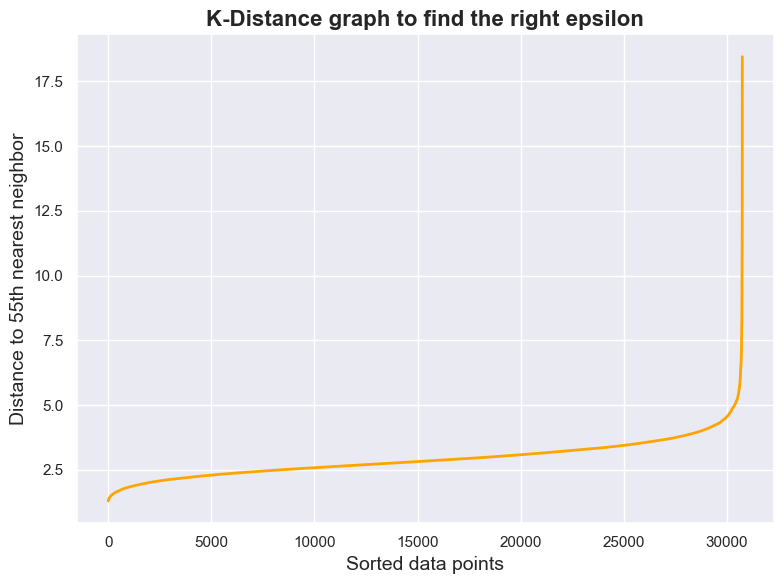

In [206]:
k_distance_graph(df_final,new_num_cols)

In [207]:
eps_value = 4.8
min_samples_value = 2 * len(new_num_cols) 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_final[new_num_cols])

outliers = dbscan_labels == -1

df_no_outliers = df_final[~outliers]

num_outliers = outliers.sum()
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 57


In [208]:
df_final = df_no_outliers.copy()

<h2>5.2 With Log Transformation</h2>

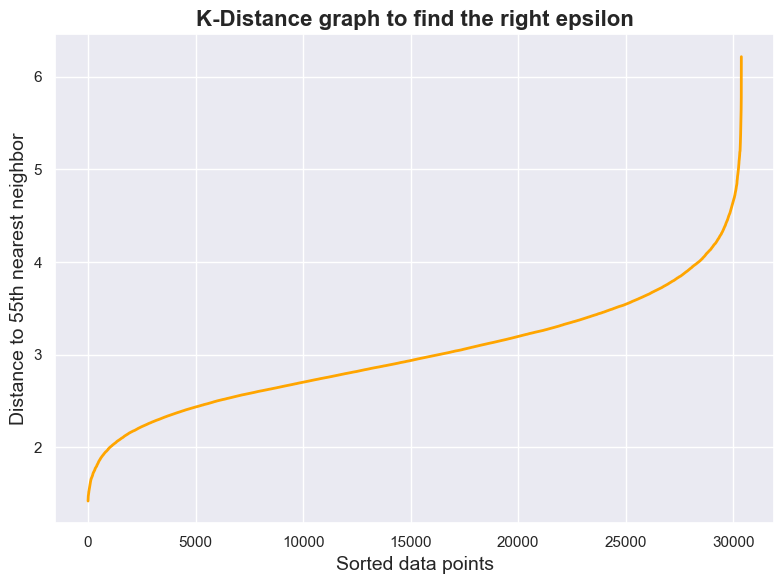

In [209]:
k_distance_graph(df_log_final,new_num_cols_transformed)

In [210]:
eps_value = 4.2
min_samples_value = 2 * len(new_num_cols_transformed) 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_log_final[new_num_cols_transformed])

outliers = dbscan_labels == -1

df_no_outliers = df_log_final[~outliers]

num_outliers = outliers.sum()
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 26


In [211]:
df_log_final = df_no_outliers.copy()

> Value based: total_spent_log, avg_order_value, weekly_prder_frequency, customer_lifetime